In [724]:
import pandas as pd 
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('./SB_cleaned.csv')
df

,Gender,Height(CM),Weight(KG),Hobbies,Time on S-Media & V-Games,10th Grade score,12th Grade score,Department,Certification (enrolled or completed),College score,Preferred study period,Daily studying time,Do you like your degree?,possibility of choosing their career based on their degree :,Salary expectation,Travelling Time,Working part-time,Financial Status,Stress Level
0,Male,100.0,58.0,Video Games,1.30 - 2 hour,79.0,65.00,BCA,No,80.00,Morning,0 - 30 minute,No,50%,40000,30 - 60 minutes,No,Bad,Bad
1,Female,90.0,40.0,Cinema,1 - 1.30 hour,70.0,80.00,BCA,No,70.00,Morning,30 - 60 minute,Yes,75%,15000,0 - 30 minutes,No,Bad,Bad
2,Male,159.0,78.0,Cinema,More than 2 hour,69.5,61.00,BCA,Yes,55.00,Anytime,1 - 2 Hour,Yes,50%,13000,30 - 60 minutes,No,Bad,Awful
3,Female,147.0,20.0,Reading books,1.30 - 2 hour,70.0,59.00,BCA,Yes,58.00,Anytime,1 - 2 Hour,No,50%,125000,0 - 30 minutes,No,Good,Bad
4,Male,170.0,54.0,Video Games,1.30 - 2 hour,40.0,65.00,BCA,No,30.00,Morning,30 - 60 minute,Yes,25%,50000,30 - 60 minutes,No,Good,Good
5,Female,139.0,33.0,Cinema,30 - 60 Minute,90.0,75.00,BCA,Yes,70.00,Night,30 - 60 minute,Yes,50%,20000,0 - 30 minutes,No,Good,Bad
6,Male,165.0,50.0,Reading books,1 - 1.30 hour,70.0,63.00,BCA,Yes,3.00,Morning,1 - 2 Hour,Yes,75%,15000,1 - 1.30 hour,No,Good,Good
7,Male,152.0,43.0,Sports,1 - 1.30 hour,61.6,61.67,BCA,No,75.00,Morning,1 - 2 Hour,Yes,50%,25000,1 - 1.30 hour,No,Good,Good
8,Male,190.0,85.0,Video Games,1.30 - 2 hour,88.2,67.50,BCA,No,60.00,Morning,0 - 30 minute,Yes,75%,20000,1 - 1.30 hour,No,Bad,Bad
9,Male,150.0,84.0,Video Games,30 - 60 Minute,60.0,65.00,BCA,No,70.00,Anytime,0 - 30 minute,Yes,75%,20000,30 - 60 minutes,No,Good,Good


# Combien de personnes ont participé au sondage?

In [725]:
print(f"{df.shape[0]} ont participé au sondage")
#df.sample(10)

235 ont participé au sondage


In [1495]:
print(f"{len(df[df['Gender'] == 'Male'])} des 235 participants sont des hommes.")
      
print(f"{len(df[df['Gender'] == 'Female'])} sont des femmes.")

print("Plusieurs études démontrent que l'Inde a plus d'hommes qui poursuivent leurs études après le lycée \nmême si"
      " cela semble changer ces dernières années.")

#https://www.hindustantimes.com/analysis/enhancing-gender-equality-in-india-s-higher-education-opinion/story-CuQKoLDc4ujMGPScy4ejJI.html

156 des 235 participants sont des hommes.
79 sont des femmes.
Plusieurs études démontrent que l'Inde a plus d'hommes qui poursuivent leurs études après le lycée 
même si cela semble changer ces dernières années.


#  Combien de personnes ont de hobbies? Qui fait quel hobbie? hommes/femmes?

In [1442]:
df['Hobbies'].value_counts()
print(df['Hobbies'].value_counts()/len(df))

print(f"Il y a 4 passe-temps. Le plus pratiqué est le sport, suivi du cinéma \net" 
" Les lecteurs et les gamers se partagent équitablement les autres avec 15% des étudiants chacun.")

Sports           0.361702
Cinema           0.331915
Video Games      0.153191
Reading books    0.153191
Name: Hobbies, dtype: float64
Il y a 4 passe-temps. Le plus pratiqué est le sport, suivi du cinéma 
et Les lecteurs et les gamers se partagent équitablement les autres avec 15% des étudiants chacun.


In [1444]:
df[['Hobbies', 'Gender']].value_counts().sum() 
df[['Hobbies', 'Gender']].value_counts() 

print(f"Le hobbie préféré des hommes est le sport." 
f"\n{round(df[['Hobbies', 'Gender']].value_counts()[2]/ len(df[df['Gender'] == 'Female']) *100,2)}% des femmes, elles, préfèrent le cinéma."
      "\nLa popularité de Bollywood explique peut-être ce phénomène." 
      " \nNous notons que c'est aussi la deuxième activité préférée des hommes. ")




Le hobbie préféré des hommes est le sport.
44.3% des femmes, elles, préfèrent le cinéma.
La popularité de Bollywood explique peut-être ce phénomène. 
Nous notons que c'est aussi la deuxième activité préférée des hommes. 


In [729]:
print("Aussi, le sondage ne propose de choisir qu'une seule activité.")

Aussi, le sondage ne propose de choisir qu'une seule activité.


# Combien de personnes ont obtenu ou sont en train de passer une certification?

In [1523]:
print(df['Certification (enrolled or completed)'].value_counts())
print('\n152 personnes ont obtenu ou sont en train de passer une certification')

print(df['Certification (enrolled or completed)'].value_counts()[0]/len(df))


Yes    152
No      83
Name: Certification (enrolled or completed), dtype: int64

152 personnes ont obtenu ou sont en train de passer une certification
0.6468085106382979


In [731]:
print(f"{round((df['Certification (enrolled or completed)'] == 'No').mean() * 100,2)}" "% des étudiants n'ont pas complété de certification")

35.32% des étudiants n'ont pas complété de certification


## Pourcentage des personnes ayant fait un certificat

In [714]:
#hommes 

cert_df_male_no = df.loc[(df['Certification (enrolled or completed)'] == 'No') & (df['Gender'] == 'Male')]
cert_df_male_yes = df.loc[(df['Certification (enrolled or completed)'] == 'Yes') & (df['Gender'] == 'Male')]

#femmes

cert_df_female_yes = df.loc[(df['Certification (enrolled or completed)'] == 'Yes') & (df['Gender'] == 'Female')]
cert_df_female_no = df.loc[(df['Certification (enrolled or completed)'] == 'No') & (df['Gender'] == 'Female')]

#Certification = Yes
cert_df_yes = df[df['Certification (enrolled or completed)'] =='Yes']

#Certification = No
cert_df_no = df[df['Certification (enrolled or completed)'] =='No']


print(f"{round(len(cert_df_female_yes)/len(cert_df_yes),4)*100} % des étudiants ayant complété ou qui sont en train de passer un certificat sont des femmes \nsoit {len(cert_df_female_yes)} personnes sur 235.")
print(f"Cela équivaut à {round(len(cert_df_female_yes)/len(df[df['Gender'] == 'Female'])*100,2)}% de la population féminine.")

36.18 % des étudiants ayant complété ou qui sont en train de passer un certificat sont des femmes 
soit 55 personnes sur 235.
Cela équivaut à 69.62% de la population féminine.


In [717]:
print(f"{round(len(cert_df_male_no)/len(cert_df_no),4)*100} % des étudiants n'ayant pas passé de certification sont des hommes \n" 
      f"soit {len(cert_df_male_no)} personnes sur 235.")

71.08 % des étudiants n'ayant pas passé de certification sont des hommes 
soit 59 personnes sur 235.


## Le certificat a-t-il un impact sur les résultats scolaires?

In [1498]:
res_3_2_oui = df[(df['Certification (enrolled or completed)'] == 'Yes') & (df['College score'])].describe().iloc[1][4]
res_3_2_non = df[(df['Certification (enrolled or completed)'] == 'No') & (df['College score'])].describe().iloc[1][4]
print(f"{round(res_3_2_oui)} est la note moyenne des étudiants ayant passé ou qui sont en train de passer un certificat")
print(f"{round(res_3_2_non)} est la note moyenne des étudiants n'ayant pas de certif")

73 est la note moyenne des étudiants ayant passé ou qui sont en train de passer un certificat
66 est la note moyenne des étudiants n'ayant pas de certif


# Quel est le salaire espéré moyen? 

In [732]:
salaire_esp = round(df['Salary expectation'].mean(),2)
salaire_esp

print(f"le salaire espéré moyen est de ₹{round(df['Salary expectation'].mean())}")

le salaire espéré moyen est de ₹23178


In [733]:
#salaire en euro

#j'ai utilisé l'API de RapidAPI pour convertir le montant en EURO

import requests
import re
url = "https://currency-converter5.p.rapidapi.com/currency/convert"

querystring = {"format":"json","from":"INR","to":"EUR","amount":salaire_esp,"language":"fr"}

headers = {
"X-RapidAPI-Key": "a8955aa740mshec23cc1bf7bdb98p1ba7edjsnd62aa3ff28d6",
"X-RapidAPI-Host": "currency-converter5.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

response.text

convert = re.findall(r'\w+', response.text)[-4:-2]

print(f"le salaire espéré moyen est de ₹{round(df['Salary expectation'].mean())} soit €{convert[0]}.{convert[1]}")

le salaire espéré moyen est de ₹23178 soit €287.4115


## Par genre

In [1474]:
salaire_genre = df.groupby('Gender').agg({'Salary expectation':'mean'})

salaire_moy_homme = salaire_genre.iloc[1][0]

salaire_moy_femme = salaire_genre.iloc[0][0]


,Salary expectation
Gender,
Female,22331.544304
Male,23606.250000


In [735]:
querystring = {"format":"json","from":"INR","to":"EUR","amount":salaire_moy_femme,"language":"fr"}

response_1 = requests.request("GET", url, headers=headers, params=querystring)

response_1.text
convert_1 = re.findall(r'\w+', response_1.text)[-4:-2]

print(f"le salaire espéré moyen des femmes est de ₹{round(salaire_moy_femme,2)} soit €{convert_1[0]}.{convert_1[1]}")

le salaire espéré moyen des femmes est de ₹22331.54 soit €276.9185


In [736]:
querystring = {"format":"json","from":"INR","to":"EUR","amount":salaire_moy_homme,"language":"fr"}
response_1 = requests.request("GET", url, headers=headers, params=querystring)

response_1.text
convert_1 = re.findall(r'\w+', response_1.text)[-4:-2]
print(f"le salaire espéré moyen des hommes est de ₹{round(salaire_moy_homme,2)} soit €{convert_1[0]}.{convert_1[1]}")

le salaire espéré moyen des hommes est de ₹23606.25 soit €292.7253


### Convertisseur INR(Rupee indien) en EUR

In [1002]:
#cela nous permet de convertir la monnaie et de pouvoir imprimer beaucoup plus vite une réponse

salaire = input()
querystring = {"format":"json","from":"INR","to":"EUR","amount":salaire,"language":"fr"}
response_1 = requests.request("GET", url, headers=headers, params=querystring)

response_1.text
convert_1 = re.findall(r'\w+', response_1.text)[-4:-2]
print(f"€{convert_1[0]}.{convert_1[1]}")


18750
€231.3615


In [738]:
print("Rien ne nous explique pourquoi les femmes s'attendent à un salaire moins élevé que celui des hommes.")

Rien ne nous explique pourquoi les femmes s'attendent à un salaire moins élevé que celui des hommes.


## Par filière/licence

In [757]:
salaire_licence = df.groupby('Department').agg({'Salary expectation':'mean'})
salaire_licence

salaire_bcom_AF = round(salaire_licence.iloc[0][0],2)
salaire_bcom_ISM = round(salaire_licence.iloc[1][0],2)
salaire_bca = round(salaire_licence.iloc[2][0],2)
salaire_comm = round(salaire_licence.iloc[3][0],2)

print(f"L'attente salariale mensuelle des étudiants en Bcom Comptabilité et Finance est le plus élevé.\nIl est de ₹{salaire_bcom_AF} soit €446.")
print(f"\nL'attente salariale mensuelle des étudiants en Bcom ISM\nvient en 2e position. Il est de ₹{salaire_bcom_ISM} soit €309.")
print(f"\nL'attente salariale mensuelle des étudiants en BCA\nest de ₹{salaire_bca} soit €284.")
print(f"\nL'attente salariale mensuelle des étudiants en Commerce est le plus bas.\nIl est de ₹{salaire_comm} soit €244.")


L'attente salariale mensuelle des étudiants en Bcom Comptabilité et Finance est le plus élevé.
Il est de ₹36000.0 soit €446.

L'attente salariale mensuelle des étudiants en Bcom ISM
vient en 2e position. Il est de ₹24918.18 soit €309.

L'attente salariale mensuelle des étudiants en BCA
est de ₹22930.0 soit €284.

L'attente salariale mensuelle des étudiants en Commerce est le plus bas.
Il est de ₹19704.97 soit €244.


## Salaire f/h selon le département

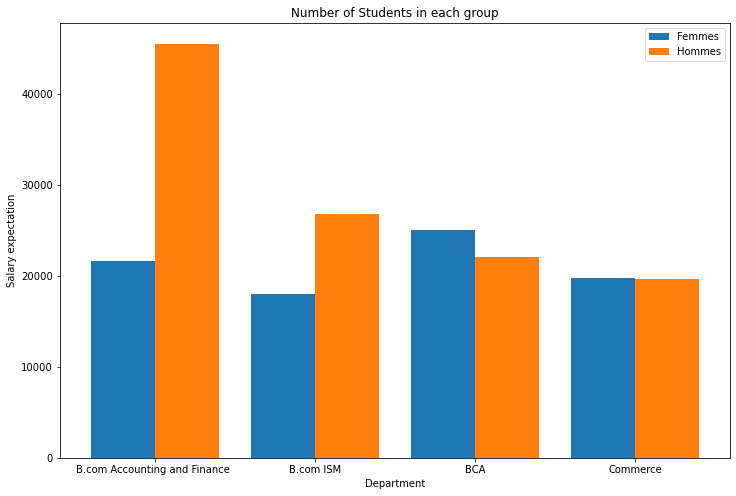

Nous constatons que les attentes salariales sont largement plus élevées chez les hommes dans nos 2 premières 
catégories et proches voir égales dans les 2 dernières 


In [573]:
salaire_licence_genre = df.groupby(['Department', 'Gender']).agg({'Salary expectation':'mean'})
salaire_licence_genre = salaire_licence_genre.reset_index()
liste_slg = []


for x in salaire_licence_genre['Salary expectation']:
    liste_slg.append(int(x))


slg_dpt = df['Department'].unique().tolist()
slg_female = liste_slg[::2]
slg_male = liste_slg[1::2]

slg_dpt.sort()
slg_dpt

fig, ax = plt.subplots(figsize=(12, 8))
x_slg = np.arange(len(slg_dpt))

plt.bar(x_slg - 0.2, slg_female, 0.4, label = 'Femmes')
plt.bar(x_slg + 0.2, slg_male, 0.4, label = 'Hommes')

plt.xticks(x_slg, slg_dpt)
plt.xlabel("Department")
plt.ylabel("Salary expectation")
plt.title("Number of Students in each group")
plt.legend()
plt.show()


print("Nous constatons que les attentes salariales sont largement plus élevées chez les hommes dans nos 2 premières \ncatégories et proches voir égales dans les 2 dernières ")

# À quelle période de la journée les étudiants préfèrent-ils réviser?

In [759]:
df['Preferred study period'].value_counts()

study_period_any = df['Preferred study period'].value_counts()[0]
study_period_morn = df['Preferred study period'].value_counts()[1]
study_period_night = df['Preferred study period'].value_counts()[2]
study_period_number = df['Preferred study period'].value_counts().sum()

print(f"{round((study_period_any/study_period_number)*100)}% des étudiants préfèrent étudier à n'importe quelle période de la journée.")

print(f"{round((study_period_morn/study_period_number)*100)}% des étudiants préfèrent étudier le matin.")

print(f"{round((study_period_night/study_period_number)*100)}% des étudiants préfèrent étudier dans la soirée.")


47% des étudiants préfèrent étudier à n'importe quelle période de la journée.
33% des étudiants préfèrent étudier le matin.
20% des étudiants préfèrent étudier dans la soirée.


## Par genre

In [776]:
df[['Preferred study period', 'Gender']].value_counts()

liste_psp_per_gen = ['psp_any_men', 'psp_mor_men', 'psp_any_wm', 'psp_ni_men', 'psp_ni_wm', 'psp_mor_wm']


liste_psp_gender = []
for x in df[['Preferred study period', 'Gender']].value_counts():
    liste_psp_gender.append(x)
    

psp_dict = dict(zip(liste_psp_per_gen, liste_psp_gender))

print(f"Chez les hommes, {psp_dict['psp_any_men']} d'entre eux n'ont pas de préférence particulière, (soit {round((psp_dict['psp_any_men']/study_period_number)*100)}% de notre échantillon)")
print(f"{psp_dict['psp_mor_men']} préfèrent étudier dans la matinée, (soit {round((psp_dict['psp_mor_men']/study_period_number)*100)}%)")

print(f"et {psp_dict['psp_ni_men']} préfèrent étudier dans la soirée. (soit {round((psp_dict['psp_ni_men']/study_period_number)*100)}%)")

print(f"\n\nChez les femmes, {psp_dict['psp_any_wm']} d'entre elles n'ont pas de préférence particulière, (soit {round((psp_dict['psp_any_wm']/study_period_number)*100)}% de notre échantillon)")

print(f"{psp_dict['psp_mor_wm']} préfèrent étudier dans la matinée, (soit {round((psp_dict['psp_mor_wm']/study_period_number)*100)}%)")

print(f"et {psp_dict['psp_ni_wm']} dans la soirée. (soit {round((psp_dict['psp_ni_wm']/study_period_number)*100)}%)")


Chez les hommes, 75 d'entre eux n'ont pas de préférence particulière, (soit 32% de notre échantillon)
56 préfèrent étudier dans la matinée, (soit 24%)
et 25 préfèrent étudier dans la soirée. (soit 11%)


Chez les femmes, 36 d'entre elles n'ont pas de préférence particulière, (soit 15% de notre échantillon)
21 préfèrent étudier dans la matinée, (soit 9%)
et 22 dans la soirée. (soit 9%)


### Pie chart

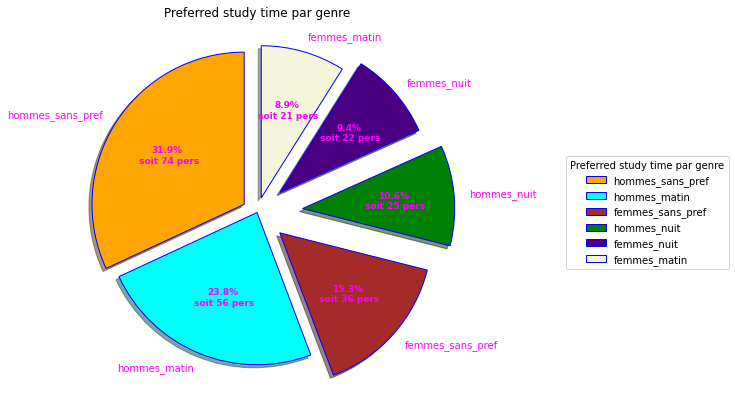

In [778]:
# Creating dataset
pie_ch_psp = ['hommes_sans_pref','hommes_matin','femmes_sans_pref', 'hommes_nuit','femmes_nuit','femmes_matin']
liste_psp_gender


# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.2, 0.1)

colors = ( "orange", "cyan", "brown",
          "green", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "blue" }


# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n soit {:d} pers".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(liste_psp_gender,
                                  autopct = lambda pct: func(pct, liste_psp_gender),
                                  explode = explode,
                                  labels = pie_ch_psp,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))

# Adding legend
ax.legend(wedges, pie_ch_psp,
          title ="Preferred study time par genre",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))
 
plt.setp(autotexts, size = 9, weight ="bold")
ax.set_title("Preferred study time par genre")
 
# show plot
plt.show()

##  Par licence

## Quelle période a le meilleur taux de réussite en note?

In [782]:
note_psp = df.groupby('Preferred study period').agg({'College score':'mean'})
note_psp.iloc[0][0]

print(f"Nous observons que les élèves n'ayant aucune préférence ont une moyenne de {round(note_psp.iloc[0][0],2)} tandis que ceux étudiant la nuit ont une note moyenne de {round(note_psp.iloc[2][0],2)} suivis de très près par les matinaux avec {round(note_psp.iloc[1][0],2)}.")


Nous observons que les élèves n'ayant aucune préférence ont une moyenne de 73.38 tandis que ceux étudiant la nuit ont une note moyenne de 68.38 suivis de très près par les matinaux avec 68.13.


## Quelle est la note moyenne par genre et par période d'étude

In [826]:
df_5_4 = df.groupby(['Preferred study period', 'Gender']).agg({'College score':'mean'}).reset_index()
score_fem_anytime = round(df_5_4['College score'][0],2)
score_men_anytime = round(df_5_4['College score'][1],2)
score_fem_morn = round(df_5_4['College score'][2],2)
score_men_morn = round(df_5_4['College score'][3],2)
score_fem_night = round(df_5_4['College score'][4],2)
score_men_night = round(df_5_4['College score'][5],2)

print(f"Nous notons que les femmes devancent les hommes dans chaque catégorie de 8 points minimum avec \n{score_fem_anytime} de moyenne pour celles qui sont sans préférence"
      f" ({score_men_anytime}/hommes)\n{score_fem_morn} pour celles qui étudient le matin ({score_men_morn}/hommes) \net {score_fem_night} pour celles qui révisent le soir (contre {score_men_night}/hommes).")



Nous notons que les femmes devancent les hommes dans chaque catégorie de 8 points minimum avec 
80.49 de moyenne pour celles qui sont sans préférence (69.96/hommes)
75.1 pour celles qui étudient le matin (65.52/hommes) 
et 72.64 pour celles qui révisent le soir (contre 64.64/hommes).


## Quelle période a le plus de notes inférieures à la moyenne

In [838]:
#nombre d'étudiants ayant moins de 65 par période
len(df.loc[(df['College score'] < 65) & (df['Preferred study period'] == 'Anytime')])
len(df.loc[(df['College score'] < 65) & (df['Preferred study period'] == 'Morning')])
len(df.loc[(df['College score'] < 65) & (df['Preferred study period'] == 'Night')])

#df des étudiants ayant moins de 65 par période
psp_mor_inf = df.loc[(df['College score'] < 65) & (df['Preferred study period'] == 'Morning')]
psp_any_inf = df.loc[(df['College score'] < 65) & (df['Preferred study period'] == 'Anytime')]
psp_nt_inf =df.loc[(df['College score'] < 65) & (df['Preferred study period'] == 'Night')]

# note moyenne des étudiants ayant moins de 65 par période
psp_mor_inf.groupby('Preferred study period').agg({'College score':'mean'})
psp_nt_inf.groupby('Preferred study period').agg({'College score':'mean'})
psp_any_inf.groupby('Preferred study period').agg({'College score':'mean'})

df['Preferred study period'].value_counts()[1]

#pourcentage

print(f"Sur {df['Preferred study period'].value_counts()[0]} élèves étudiant à n'importe quelle heure, {round(len(df.loc[(df['College score'] < 65) & (df['Preferred study period'] == 'Anytime')])/ df['Preferred study period'].value_counts()[0]*100,2)}% ont une moyenne inférieure à 65,")

print(f"sur {df['Preferred study period'].value_counts()[1]} étudiant le matin, {round(len(df.loc[(df['College score'] < 65) & (df['Preferred study period'] == 'Morning')])/ df['Preferred study period'].value_counts()[1]*100,2)}%")

print(f"et sur {df['Preferred study period'].value_counts()[2]} étudiant la nuit, {round(len(df.loc[(df['College score'] < 65) & (df['Preferred study period'] == 'Night')]) / df['Preferred study period'].value_counts()[2]*100,2)}%.")

print('\nDonc nous pouvons en déduire que ceux qui étudient dans la matinée réussissent le moins bien en général.')

Sur 111 élèves étudiant à n'importe quelle heure, 19.82% ont une moyenne inférieure à 65,
sur 77 étudiant le matin, 33.77%
et sur 47 étudiant la nuit, 25.53%.

Donc nous pouvons en déduire que ceux qui étudient dans la matinée réussissent le moins bien en général.


# Quel est l'état financier des étudiants?

In [959]:
round(df[['Financial Status']].value_counts() / len(df) *100,2)[0]
print(f"{df[['Financial Status']].value_counts()[0]} ({round(df[['Financial Status']].value_counts() / len(df) *100,2)[0]}%) étudiants sont en bonne situation financière,") 
print(f"{df[['Financial Status']].value_counts()[1]} ({round(df[['Financial Status']].value_counts() / len(df) *100,2)[1]}%) ne le sont pas,") 
print(f"{df[['Financial Status']].value_counts()[2]} ({round(df[['Financial Status']].value_counts() / len(df) *100,2)[2]}%) sont en très mauvaise situation financière")
print(f"tandis que {df[['Financial Status']].value_counts()[3]} ({round(df[['Financial Status']].value_counts() / len(df) *100,2)[3]}%) le sont en très bonne.")

print("\nNous ne savons pas si leur situation financière est dûe à une bonne ou mauvaise gestion, \ns'ils viennent de familles riches ou pas, une combinaison des 2 ou s'il y'a d'autres facteurs.")
print("Mais quasiment la moitié est en bonne situation et l'autre non.")


129 (54.89%) étudiants sont en bonne situation financière,
88 (37.45%) ne le sont pas,
14 (5.96%) sont en très mauvaise situation financière
tandis que 4 (1.7%) le sont en très bonne.

Nous ne savons pas si leur situation financière est dûe à une bonne ou mauvaise gestion, 
s'ils viennent de familles riches ou pas, une combinaison des 2 ou s'il y'a d'autres facteurs.
Mais quasiment la moitié est en bonne situation et l'autre non.


##  Les finances ont-elles un impact sur le préférences salariales?

In [1016]:
df_6_1_good = df[df['Financial Status'] == 'Good'].describe()
df_6_1_bad = df[df['Financial Status'] == 'Bad'].describe()
df_6_1_awful = df[df['Financial Status'] == 'Awful'].describe()
df_6_1_fab = df[df['Financial Status'] == 'Fabulous'].describe()
print(f"₹ {round(df_6_1_good.iloc[1][5])} (€279) de moyenne salariale espérée pour ceux qui ont un bon état financier.")
print(f"₹ {round(df_6_1_bad.iloc[1][5])} (€297)de moyenne salariale espérée pour ceux qui ont un mauvais état financier")
print(f"₹ {round(df_6_1_awful.iloc[1][5])} (€297) de moyenne salariale espérée pour ceux qui ont un très mauvais état financier")
print(f"₹ {round(df_6_1_fab.iloc[1][5])} (€231) de moyenne espérée pour ceux qui ont un très bon état financier")

print("\nOui, les finances ont un impact sur les préférences salariales.Nous notons que les personnes qui sont en mauvais état financier espèrent un salaire plus élevé que \nceux qui ne le sont pas.") 

₹ 22633 (€279) de moyenne salariale espérée pour ceux qui ont un bon état financier.
₹ 24034 (€297)de moyenne salariale espérée pour ceux qui ont un mauvais état financier
₹ 24078 (€297) de moyenne salariale espérée pour ceux qui ont un très mauvais état financier
₹ 18750 (€231) de moyenne espérée pour ceux qui ont un très bon état financier

Oui, les finances ont un impact sur les préférences salariales.Nous notons que les personnes qui sont en mauvais état financier espèrent un salaire plus élevé que 
ceux qui ne le sont pas.


## Par genre

In [990]:
print("Situation financière des hommes:")
res_6_2_m_bien = print(f"{round(df[['Financial Status', 'Gender']].value_counts()[0] / len(df[df['Gender'] == 'Male'])*100,2)}% bonne")
res_6_2_m_mauvais = print(f"{round(df[['Financial Status', 'Gender']].value_counts()[1] / len(df[df['Gender'] == 'Male'])*100,2)}% mauvaise")
res_6_2_m_très_m = print(f"{round(df[['Financial Status', 'Gender']].value_counts()[4] / len(df[df['Gender'] == 'Male'])*100,2)}% très mauvaise")
res_6_2_m_très_b = print(f"{round(df[['Financial Status', 'Gender']].value_counts()[6] / len(df[df['Gender'] == 'Male'])*100,2)}% très bonne")

Situation financière des hommes:
49.36% bonne
41.67% mauvaise
7.05% très mauvaise
1.92% très bonne


In [991]:
print("Situation financière des femmes:")
print(f"{round(df[['Financial Status', 'Gender']].value_counts()[2] / len(df[df['Gender'] == 'Female'])*100,2)}% bonne")
print(f"{round(df[['Financial Status', 'Gender']].value_counts()[3] / len(df[df['Gender'] == 'Female'])*100,2)}% mauvaise")
print(f"{round(df[['Financial Status', 'Gender']].value_counts()[5] / len(df[df['Gender'] == 'Female'])*100,2)}% très mauvaise")
print(f"{round(df[['Financial Status', 'Gender']].value_counts()[7] / len(df[df['Gender'] == 'Female'])*100,2)}% très bonne")

Situation financière des femmes:
65.82% bonne
29.11% mauvaise
3.8% très mauvaise
1.27% très bonne


In [994]:
print("Nous constatons que la tendance générale est reflétée dans la population masculine tandis que les 2/3 de population \nféminine se retrouve en bonne situation financière")





Nous constatons que la tendance générale est reflétée dans la population masculine tandis que les 2/3 de population 
féminine se retrouve en bonne situation financière


In [1047]:
df_6_2 = df[['Financial Status', 'Gender']].value_counts().to_frame().reset_index()
df_6_2.rename(columns= col_nm_7_3, inplace= True)
df_6_2 = df_6_2.sort_values(by = ['Financial Status'])
df_6_2.reset_index(drop=True, inplace=True)
print(df_6_2)

liste_valeurs_6_2= []

for x in df_6_2['Total num students']:
    liste_valeurs_6_2.append(x) 
liste_valeurs_6_2[0]

for val in liste_valeurs_6_2[1:2]:
    print(val) 

  Financial Status  Gender  Total num students
0            Awful    Male                  11
1            Awful  Female                   3
2              Bad    Male                  65
3              Bad  Female                  23
4         Fabulous    Male                   3
5         Fabulous  Female                   1
6             Good    Male                  77
7             Good  Female                  52
3


In [1056]:
rep_6_2 = []

for val in liste_valeurs_6_2[0:1]:
    w = val / (len(df[df['Gender'] == 'Male'])) *100
    rep_6_2.append(round((w),2))

#pourcentage des étudiants sur la population totale lecture

for val in liste_valeurs_6_2[1:2]:
    y = val / (len(df[df['Gender'] == 'Female'])) *100
    rep_6_2.append(round((y),2))

#pourcentage des étudiants sur la population totale sport
for val in liste_valeurs_6_2[2:3]:
    z = val / len(df[df['Gender'] == 'Male']) *100
    rep_6_2.append(round((z),2))

#pourcentage des étudiants sur la population totale jex vidéos
for val in liste_valeurs_6_2[3:4]:
    a = val / len(df[df['Gender'] == 'Female']) *100
    rep_6_2.append(round((a),2))
    

for val in liste_valeurs_6_2[4:5]:
    b = val / len(df[df['Gender'] == 'Male']) *100
    rep_6_2.append(round((b),2))

# #pourcentage des étudiants sur la population totale lecture

for val in liste_valeurs_6_2[5:6]:
    c = val / len(df[df['Gender'] == 'Female']) *100
    rep_6_2.append(round((c),2))

for val in liste_valeurs_6_2[6:7]:
    d = val / len(df[df['Gender'] == 'Male']) *100
    rep_6_2.append(round((d),2))

# #pourcentage des étudiants sur la population totale lecture

for val in liste_valeurs_6_2[7:8]:
    e = val / len(df[df['Gender'] == 'Female']) *100
    rep_6_2.append(round((e),2))


df_6_2['Total num students in %'] = rep_6_2

<AxesSubplot:xlabel='Financial Status', ylabel='Total num students in %'>

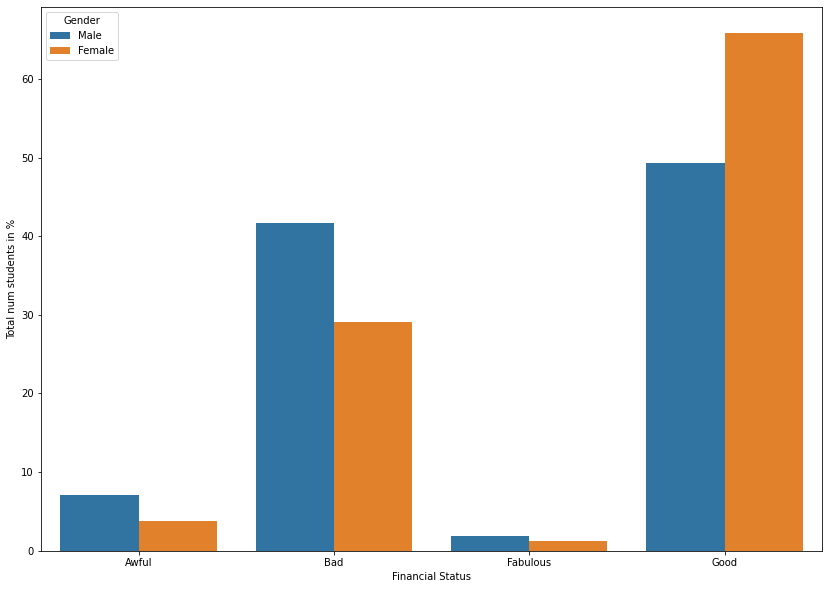

In [1057]:
# plot barplot

fig, ax = plt.subplots(figsize =(14,10))
sns.barplot(x="Financial Status",
           y="Total num students in %",
           hue="Gender",
           data=df_6_2)

## Par licence

In [1018]:
#df[['Financial Status', 'Department','Gender']].value_counts()
df[['Financial Status', 'Department']].value_counts()#.to_frame()


Financial Status  Department                   
Good              BCA                              73
Bad               BCA                              47
Good              Commerce                         32
Bad               Commerce                         25
Good              B.com ISM                        15
Bad               B.com ISM                        11
Awful             BCA                              10
Good              B.com Accounting and Finance      9
Bad               B.com Accounting and Finance      5
Awful             B.com ISM                         2
Fabulous          BCA                               2
                  Commerce                          2
Awful             B.com Accounting and Finance      1
                  Commerce                          1
dtype: int64

# Quel est le niveau de stress des étudiants?

## Par genre

In [1059]:
df[['Stress Level ', 'Gender', 'Department']].value_counts()#to_frame()
df[['Stress Level ', 'Gender']].value_counts()

tot_male_num = df[df['Gender']== 'Male'].shape[0]
tot_fem_num = df[df['Gender'] == 'Female'].shape[0]

stress_lvl_liste = df['Stress Level '].unique().tolist()
print(df[['Stress Level ', 'Gender']].value_counts())
#sort my df according to gender and then create my lists and then create a loop to rename one of the lists and then attrubute the values

col_nm_7_3 = {0: 'Total num students'}


Stress Level   Gender
Good           Male      89
               Female    48
Bad            Male      45
               Female    23
Awful          Male      14
Fabulous       Male       8
Awful          Female     5
Fabulous       Female     3
dtype: int64


In [1063]:
#1
df_7_1 = df[['Stress Level ', 'Gender']].value_counts().to_frame().reset_index()
df_7_1.rename(columns= col_nm_7_3, inplace= True)
df_7_1 = df_7_1.sort_values(by = ['Stress Level '])
df_7_1

#2
liste_titre_7_1 = []

for x in df_7_1['Stress Level '][0::2]:
    liste_titre_7_1.append('Male_strs_lvl_' + x)
    
for x in df_7_1['Stress Level '][1::2]:
    liste_titre_7_1.append('Fem_str_lvl_ '+ x)
#3      
liste_valeurs_7_1= []

for x in df_7_1['Total num students'][0::2]:
    liste_valeurs_7_1.append(x)
for x in df_7_1['Total num students'][1::2]:
    liste_valeurs_7_1.append(x)
    
#4 creating a dictionary even though unnecessary 
stress_7_1_dict = dict(zip(liste_titre_7_1, liste_valeurs_7_1))


In [1062]:

for i in range(0,8,4):
    print(f"{liste_valeurs_7_1[i]} {rep_7_1[i]} {rep_7_1_a[i]} sont trop \n stressé(e)s\n")
    
for i in range(1,8, 4):
    print(f"{liste_valeurs_7_1[i]} {rep_7_1[i]} {rep_7_1_a[i]} sont stressé(e)s \n") 
for i in range(2,8, 4):
    print(f"{liste_valeurs_7_1[i]} {rep_7_1[i]} {rep_7_1_a[i]} sont peu \n stressé(e)s\n")    
for i in range(3,8, 4):
    print(f"{liste_valeurs_7_1[i]} {rep_7_1[i]} {rep_7_1_a[i]} n'ont pas de stress\n")

14 hommes soit 9% de la population masculine ou 6% de la population globale de notre jeu de donnée sont trop 
 stressé(e)s

5 femmes soit 6% de la population feminine ou 2% de la population globale de notre jeu de donnée sont trop 
 stressé(e)s

45 hommes soit 29% de la population masculine ou 19% de la population globale de notre jeu de donnée sont stressé(e)s 

23 femmes soit 29% de la population feminine ou 10% de la population globale de notre jeu de donnée sont stressé(e)s 

89 hommes soit 57% de la population masculine ou 38% de la population globale de notre jeu de donnée sont peu 
 stressé(e)s

48 femmes soit 61% de la population feminine ou 20% de la population globale de notre jeu de donnée sont peu 
 stressé(e)s

8 hommes soit 5% de la population masculine ou 3% de la population globale de notre jeu de donnée n'ont pas de stress

3 femmes soit 4% de la population feminine ou 1% de la population globale de notre jeu de donnée n'ont pas de stress



In [40]:
print(f"Sur la population strictement féminine, 61% ont peu de stresse et 4% n'en ressentent pas comparé à son opposé \nqui en pourcentage ne fait que 'mieux' dans la dernière catégorie mais seulement d'1%.\nDonc les femmes gèrent mieux le stresse.")

Sur la population strictement féminine, 61% ont peu de stresse et 4% n'en ressentent pas comparé à son opposé 
qui en pourcentage ne fait que 'mieux' dans la dernière catégorie mais seulement d'1%.
Donc les femmes gèrent mieux le stresse.


## Par filière

In [41]:
df[['Stress Level ',  'Department']].value_counts()#to_frame()

Stress Level   Department                   
Good           BCA                              76
Bad            BCA                              43
Good           Commerce                         41
               B.com ISM                        13
Bad            B.com ISM                        11
Awful          BCA                              10
Bad            Commerce                         10
Good           B.com Accounting and Finance      7
Awful          Commerce                          5
Bad            B.com Accounting and Finance      4
fabulous       Commerce                          4
               BCA                               3
Awful          B.com Accounting and Finance      2
               B.com ISM                         2
fabulous       B.com Accounting and Finance      2
               B.com ISM                         2
dtype: int64

In [51]:
#don't forget to reset index for this dataframe

df_7_2 = df[['Stress Level ', 'Department']].value_counts().to_frame().reset_index()
df_7_2.rename(columns= col_nm_7_3, inplace= True)
df_7_2 = df_7_2.sort_values(by = ['Department'])
df_7_2.reset_index(drop=True, inplace=True)
df_7_2['Total num students in %'] = rep_7_2_perc
print(df_7_2)


liste_valeurs_7_2= []

for x in df_7_2['Total num students']:
    liste_valeurs_7_2.append(x)

   Stress Level                      Department  Total num students  \
0           Good  B.com Accounting and Finance                    7   
1            Bad  B.com Accounting and Finance                    4   
2          Awful  B.com Accounting and Finance                    2   
3       fabulous  B.com Accounting and Finance                    2   
4           Good                      B.com ISM                  13   
5            Bad                      B.com ISM                  11   
6          Awful                      B.com ISM                   2   
7       fabulous                      B.com ISM                   2   
8           Good                            BCA                  76   
9            Bad                            BCA                  43   
10         Awful                            BCA                  10   
11      fabulous                            BCA                   3   
12          Good                       Commerce                  41   
13    

###  Nombre d'étudiants stressés des différents départements en %

In [50]:
rep_7_2_perc = []

for val in liste_valeurs_7_2[0:4]:
    w = val / tot_etd_bcom_f *100
    rep_7_2_perc.append(round((w),2))

#pourcentage des étudiants sur la population totale BCom ism

for val in liste_valeurs_7_2[4:8]:
    y = val / tot_etd_bcom_ism *100
    rep_7_2_perc.append(round((y),2))

#pourcentage des étudiants sur la population totale BCA   
for val in liste_valeurs_7_2[8:12]:
    z = val / tot_etd_bca *100
    rep_7_2_perc.append(round((z),2))

#pourcentage des étudiants sur la population totale Com   
for val in liste_valeurs_7_2[12:16]:
    v = val / tot_etd_com *100
    rep_7_2_perc.append(round((v),2))

rep_7_2_perc

[46.67,
 26.67,
 13.33,
 13.33,
 46.43,
 39.29,
 7.14,
 7.14,
 57.58,
 32.58,
 7.58,
 2.27,
 68.33,
 16.67,
 8.33,
 6.67]

In [48]:
tot_num_etd_dpt = 4 *[tot_etd_bcom_f ] + 4 *[tot_etd_bcom_ism] + 4*[tot_etd_bca] + 4*[tot_etd_com]

#pourcentage des étudiants sur la population totale BCom Finance

for val in liste_valeurs_7_2[0:4]:
    w = val / tot_etd_bcom_f *100
    rep_7_2.append((f"soit {round(w)}% du total des étudiants en Bcom Finance"))

#pourcentage des étudiants sur la population totale BCom ism

for val in liste_valeurs_7_2[4:8]:
    y = val / tot_etd_bcom_ism *100
    rep_7_2.append((f"soit {round(y)}% du total des étudiants en Bcom ISM"))

#pourcentage des étudiants sur la population totale BCA   
for val in liste_valeurs_7_2[8:12]:
    z = val / tot_etd_bca *100
    rep_7_2.append((f"soit {round(z)}% du total des étudiants en BCA"))

#pourcentage des étudiants sur la population totale Com   
for val in liste_valeurs_7_2[12:16]:
    v = val / tot_etd_com *100
    rep_7_2.append((f"soit {round(v)}% du total des étudiants en Commerce"))

In [1065]:
rep_7_2

['(47%) étudiants en Bcom Finance',
 '(27%) étudiants en Bcom Finance',
 '(13%) étudiants en Bcom Finance',
 '(13%) étudiants en Bcom Finance',
 '(46%) étudiants en Bcom ISM',
 '(39%) étudiants en Bcom ISM',
 '(7%) étudiants en Bcom ISM',
 '(7%) étudiants en Bcom ISM',
 '(58%) étudiants en BCA',
 '(33%) étudiants en BCA',
 '(8%) étudiants en BCA',
 '(2%) étudiants en BCA',
 '(68%) étudiants en Commerce',
 '(17%) étudiants en Commerce',
 '(8%) étudiants en Commerce',
 '(7%) étudiants en Commerce']

In [1064]:
tot_etd_bcom_f = df_7_2['Total num students'][0:4].sum()
tot_etd_bcom_ism = df_7_2['Total num students'][4:8].sum()
tot_etd_bca = df_7_2['Total num students'][8:12].sum()
tot_etd_com = df_7_2['Total num students'][12:17].sum()

#pourcentage des étudiants sur la population totale BCom finance

rep_7_2 = []

for val in liste_valeurs_7_2[0:4]:
    w = val / tot_etd_bcom_f *100
    rep_7_2.append((f"({round(w)}%) étudiants en Bcom Finance"))

#pourcentage des étudiants sur la population totale BCom ism

for val in liste_valeurs_7_2[4:8]:
    y = val / tot_etd_bcom_ism *100
    rep_7_2.append((f"({round(y)}%) étudiants en Bcom ISM"))

#pourcentage des étudiants sur la population totale BCA   
for val in liste_valeurs_7_2[8:12]:
    z = val / tot_etd_bca *100
    rep_7_2.append((f"({round(z)}%) étudiants en BCA"))

#pourcentage des étudiants sur la population totale Com   
for val in liste_valeurs_7_2[12:16]:
    v = val / tot_etd_com *100
    rep_7_2.append((f"({round(v)}%) étudiants en Commerce"))


In [1066]:
#pourcentage des hommes et femmes sur le total de notre population
rep_7_2_a = []

for x in liste_valeurs_7_2:
    y = x / (tot_fem_num+tot_male_num)*100
    rep_7_2_a.append((f"ou {round(y)}% de la population globale étudiante"))

rep_7_2_a

['ou 3% de la population globale étudiante',
 'ou 2% de la population globale étudiante',
 'ou 1% de la population globale étudiante',
 'ou 1% de la population globale étudiante',
 'ou 6% de la population globale étudiante',
 'ou 5% de la population globale étudiante',
 'ou 1% de la population globale étudiante',
 'ou 1% de la population globale étudiante',
 'ou 32% de la population globale étudiante',
 'ou 18% de la population globale étudiante',
 'ou 4% de la population globale étudiante',
 'ou 1% de la population globale étudiante',
 'ou 17% de la population globale étudiante',
 'ou 4% de la population globale étudiante',
 'ou 2% de la population globale étudiante',
 'ou 2% de la population globale étudiante']

In [53]:
for i in range(0,16,4):
    print(f"{liste_valeurs_7_2[i]} sur {tot_num_etd_dpt[i]} {rep_7_2[i]} {rep_7_2_a[i]} gèrent BIEN \n le stresse\n")
    
for i in range(1,16, 4):
    print(f"{liste_valeurs_7_2[i]} sur {tot_num_etd_dpt[i]} {rep_7_2[i]} {rep_7_2_a[i]} gèrent mal le stresse\n") 
for i in range(2,16, 4):
    print(f"{liste_valeurs_7_2[i]} sur {tot_num_etd_dpt[i]} {rep_7_2[i]} {rep_7_2_a[i]} gèrent TRÈS \n mal le stresse\n")    
for i in range(3,16, 4):
    print(f"{liste_valeurs_7_2[i]} sur {tot_num_etd_dpt[i]} {rep_7_2[i]} {rep_7_2_a[i]} se sentent très BIEN")

7 sur 15 (47%) étudiants en Bcom Finance ou 3% de la population globale étudiante gèrent BIEN 
 le stresse

13 sur 28 (46%) étudiants en Bcom ISM ou 6% de la population globale étudiante gèrent BIEN 
 le stresse

76 sur 132 (58%) étudiants en BCA ou 32% de la population globale étudiante gèrent BIEN 
 le stresse

41 sur 60 (68%) étudiants en Commerce ou 17% de la population globale étudiante gèrent BIEN 
 le stresse

4 sur 15 (27%) étudiants en Bcom Finance ou 2% de la population globale étudiante gèrent mal le stresse

11 sur 28 (39%) étudiants en Bcom ISM ou 5% de la population globale étudiante gèrent mal le stresse

43 sur 132 (33%) étudiants en BCA ou 18% de la population globale étudiante gèrent mal le stresse

10 sur 60 (17%) étudiants en Commerce ou 4% de la population globale étudiante gèrent mal le stresse

2 sur 15 (13%) étudiants en Bcom Finance ou 1% de la population globale étudiante gèrent TRÈS 
 mal le stresse

2 sur 28 (7%) étudiants en Bcom ISM ou 1% de la population 

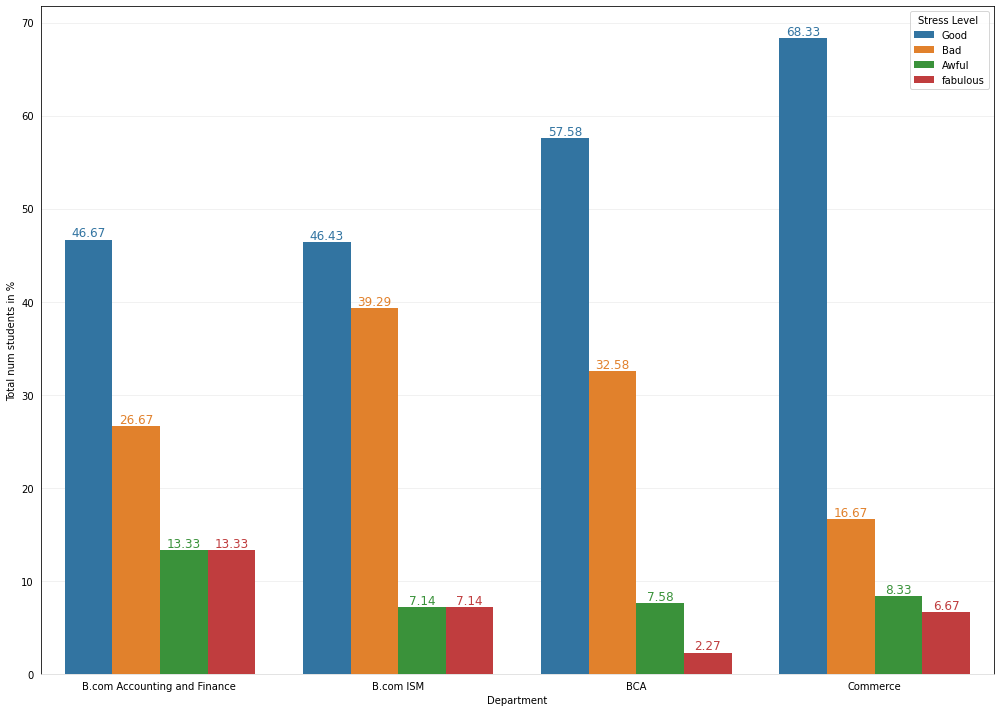

In [55]:
# plot barplot

fig, ax = plt.subplots(figsize =(14,10))
sns.barplot(x="Department",
           y="Total num students in %",
           hue="Stress Level ",
           data=df_7_2)

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

fig.tight_layout()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

In [57]:
print(f"La branche la moins 'stressante' est celle du Commerce")

La branche la moins 'stressante' est celle du Commerce


## Impacte-t-il les notes?

In [58]:
print(f"{round(df[df['Stress Level '] == 'Good'].mean()[4],2)} de moyenne pour ceux gérant bien le stresse.")
print(f"{round(df[df['Stress Level '] == 'Bad'].mean()[4],2)} de moyenne pour ceux gérant mal le stresse.")
print(f"{round(df[df['Stress Level '] == 'fabulous'].mean()[4],2)} de moyenne pour ceux gérant très mal le stresse.")
print(f"{round(df[df['Stress Level '] == 'Awful'].mean()[4],2)} de moyenne pour ceux gérant très bien le stresse.")



71.54 de moyenne pour ceux gérant bien le stresse.
68.75 de moyenne pour ceux gérant mal le stresse.
72.18 de moyenne pour ceux gérant très mal le stresse.
70.26 de moyenne pour ceux gérant très bien le stresse.


/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/1976078524.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(f"{round(df[df['Stress Level '] == 'Good'].mean()[4],2)} de moyenne pour ceux gérant bien le stresse.")
/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/1976078524.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(f"{round(df[df['Stress Level '] == 'Bad'].mean()[4],2)} de moyenne pour ceux gérant mal le stresse.")
/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/1976078524.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprec

In [59]:
print(f"Les résultats démontrent que le niveau de stresse, même si minime différence il existe,\nimpacte pas ou peu les notes.\nAu contraire, ce qui paraît assez étrange soit le fait que ceux qui ayant un niveau de stresse très élevé \nont une meilleure moyenne que ceux ayant un niveau élevé.")



Les résultats démontrent que le niveau de stresse, même si minime différence il existe,
impacte pas ou peu les notes.
Au contraire, ce qui paraît assez étrange soit le fait que ceux qui ayant un niveau de stresse très élevé 
ont une meilleure moyenne que ceux ayant un niveau élevé.


## Est-ce que les étudiants faisant du sport sont moins stressés?

QUEL Hobby détient les élèves les moins stressés

In [60]:
pd.set_option('display.max_rows', 235)
df

,Gender,Height(CM),Weight(KG),Hobbies,Time on SMedia & VGames,10th grade score,12th grade score,Department,Certification (enrolled or completed),College Mark,Preferred study period,Daily studying time,Do you like your degree?,possibility of choosing their career based on their degree :,Salary expectation,Travelling Time,Working part-time,Financial Status,Stress Level,Financial category
0,Male,100.0,58.0,Video Games,1.30 - 2 hour,79.0,65.00,BCA,No,80.00,Morning,0 - 30 minute,No,50%,40000,30 - 60 minutes,No,Bad,Bad,30
1,Female,90.0,40.0,Cinema,1 - 1.30 hour,70.0,80.00,BCA,No,70.00,Morning,30 - 60 minute,Yes,75%,15000,0 - 30 minutes,No,Bad,Bad,30
2,Male,159.0,78.0,Cinema,More than 2 hour,69.5,61.00,BCA,Yes,55.00,Anytime,1 - 2 Hour,Yes,50%,13000,30 - 60 minutes,No,Bad,Awful,30
3,Female,147.0,20.0,Reading books,1.30 - 2 hour,70.0,59.00,BCA,Yes,58.00,Anytime,1 - 2 Hour,No,50%,125000,0 - 30 minutes,No,good,Bad,60
4,Male,170.0,54.0,Video Games,1.30 - 2 hour,40.0,65.00,BCA,No,30.00,Morning,30 - 60 minute,Yes,25%,50000,30 - 60 minutes,No,good,Good,60
5,Female,139.0,33.0,Cinema,30 - 60 Minute,90.0,75.00,BCA,Yes,70.00,Night,30 - 60 minute,Yes,50%,20000,0 - 30 minutes,No,good,Bad,60
6,Male,165.0,50.0,Reading books,1 - 1.30 hour,70.0,63.00,BCA,Yes,3.00,Morning,1 - 2 Hour,Yes,75%,15000,1 - 1.30 hour,No,good,Good,60
7,Male,152.0,43.0,Sports,1 - 1.30 hour,61.6,61.67,BCA,No,75.00,Morning,1 - 2 Hour,Yes,50%,25000,1 - 1.30 hour,No,good,Good,60
8,Male,190.0,85.0,Video Games,1.30 - 2 hour,88.2,67.50,BCA,No,60.00,Morning,0 - 30 minute,Yes,75%,20000,1 - 1.30 hour,No,Bad,Bad,30
9,Male,150.0,84.0,Video Games,30 - 60 Minute,60.0,65.00,BCA,No,70.00,Anytime,0 - 30 minute,Yes,75%,20000,30 - 60 minutes,No,good,Good,60


In [61]:
#df[['Stress Level ', 'Hobbies', 'College Mark']].value_counts().to_frame().sort_values(by = ['Stress Level '])

0
Stress Level  Hobbies       College Mark   
Awful         Sports        80.00         2
              Cinema        55.00         1
              Sports        60.00         2
              Reading books 70.00         2
              Cinema        65.00         1
                            70.00         1
              Sports        65.00         1
                            75.00         1
              Video Games   65.00         1
              Cinema        90.00         2
                            80.00         2
                            75.00         2
                            30.00         1
Bad           Cinema        90.00         1
              Sports        89.00         1
              Video Games   88.00         1
              Reading books 85.00         2
              Video Games   68.00         1
              Sports        73.30         1
              Video Games   85.00         1
              Sports        66.00         1
              Video Games   50.00         1
              Sports        55.00         1
              Reading books 79.00         1
              Cinema        50.00         2
              Reading books 60.00         1
                            58.00         1
                            50.00         1
              Cinema        85.00         1
              Sports        75.00         1
              Cinema        75.00         1
                            74.00         1
                            65.00         1
                            53.00         1
              Sports        74.00         1
                            78.00         1
                            65.00         1
              Reading books 75.00         1
              Sports        80.00         1
                            70.00         4
              Cinema        60.00         5
              Sports        50.00         4
              Video Games   80.00         2
              Sports        60.00         4
              Cinema        70.00         5
              Video Games   70.00         4
              Cinema        80.00         3
              Video Games   65.00         2
                            60.00         3
              Sports        95.00         1
              Reading books 80.00         3
Good          Cinema        75.00         4
              Video Games   80.00         3
              Cinema        50.00         4
              Video Games   60.00         4
              Sports        65.00         5
              Reading books 80.00         4
                            70.00         2
              Sports        80.00         7
              Video Games   65.00         3
              Sports        60.00         8
              Cinema        82.96         1
                            84.00         1
                            86.00         1
                            88.00         1
                            89.00         1
              Sports        75.00         5
              Reading books 1.00          1
                            12.00         1
              Cinema        79.00         1
              Reading books 50.00         1
              Cinema        85.00         8
                            80.00         7
                            70.00         7
              Reading books 3.00          1
                            75.00         3
                            85.00         3
              Sports        85.00         2
                            55.00         2
              Reading books 100.00        2
              Sports        35.00         1
              Reading books 86.00         1
                            90.00         1
                            95.00         1
              Sports        7.50          1
                            50.00         1
                            66.30         1
                            67.00         1
                            69.00         1
              Cinema        76.00     

In [62]:
df.groupby(['Hobbies', 'Stress Level '])['College Mark'].mean()

Hobbies        Stress Level 
Cinema         Awful            71.000000
               Bad              68.190476
               Good             75.067273
               fabulous         80.666667
Reading books  Awful            70.000000
               Bad              73.200000
               Good             70.227273
               fabulous         70.000000
Sports         Awful            70.000000
               Bad              66.831818
               Good             70.114808
               fabulous         70.400000
Video Games    Awful            65.000000
               Bad              69.400000
               Good             68.789474
               fabulous         60.000000
Name: College Mark, dtype: float64

In [63]:
df[['Stress Level ', 'Hobbies']].value_counts()

Stress Level   Hobbies      
Good           Sports           52
               Cinema           44
Bad            Sports           22
Good           Reading books    22
Bad            Cinema           21
Good           Video Games      19
Bad            Video Games      15
Awful          Cinema           10
Bad            Reading books    10
Awful          Sports            6
fabulous       Sports            5
               Cinema            3
Awful          Reading books     2
fabulous       Reading books     2
Awful          Video Games       1
fabulous       Video Games       1
dtype: int64

In [64]:
#don't forget to reset index for this dataframe

df_7_4 = df[['Stress Level ', 'Hobbies']].value_counts().to_frame().reset_index()
df_7_4.rename(columns= col_nm_7_3, inplace= True)
df_7_4 = df_7_4.sort_values(by = ['Hobbies'])
df_7_4.reset_index(drop=True, inplace=True)
print(df_7_4)


liste_valeurs_7_4= []

for x in df_7_4['Total num students']:
    liste_valeurs_7_4.append(x)

   Stress Level         Hobbies  Total num students
0           Good         Cinema                  44
1            Bad         Cinema                  21
2          Awful         Cinema                  10
3       fabulous         Cinema                   3
4           Good  Reading books                  22
5            Bad  Reading books                  10
6          Awful  Reading books                   2
7       fabulous  Reading books                   2
8           Good         Sports                  52
9            Bad         Sports                  22
10         Awful         Sports                   6
11      fabulous         Sports                   5
12          Good    Video Games                  19
13           Bad    Video Games                  15
14         Awful    Video Games                   1
15      fabulous    Video Games                   1


In [65]:
tot_etd_cine = df_7_4['Total num students'][0:4].sum()
tot_etd_lect = df_7_4['Total num students'][4:8].sum()
tot_etd_sport = df_7_4['Total num students'][8:12].sum()
tot_etd_jv = df_7_4['Total num students'][12:17].sum()

#pourcentage des étudiants sur la population totale BCom finance

rep_7_4 = []

for val in liste_valeurs_7_4[0:4]:
    w = val / tot_etd_cine *100
    rep_7_4.append((f"({round((w),2)}%) élèves ayant pour passe-temps le cinéma"))

#pourcentage des étudiants sur la population totale BCom ism

for val in liste_valeurs_7_4[4:8]:
    y = val / tot_etd_lect *100
    rep_7_4.append((f"({round((y),2)}%) élèves ayant pour passe-temps la lecture"))

#pourcentage des étudiants sur la population totale BCA   
for val in liste_valeurs_7_4[8:12]:
    z = val / tot_etd_sport *100
    rep_7_4.append((f"({round((z),2)}%) élèves ayant pour passe-temps le sport"))

#pourcentage des étudiants sur la population totale Com   
for val in liste_valeurs_7_4[12:16]:
    v = val / tot_etd_jv *100
    rep_7_4.append((f"({round((v),2)}%) élèves ayant pour passe-temps les jeux-vidéos"))
    
rep_7_4

['(56.41%) élèves ayant pour passe-temps le cinéma',
 '(26.92%) élèves ayant pour passe-temps le cinéma',
 '(12.82%) élèves ayant pour passe-temps le cinéma',
 '(3.85%) élèves ayant pour passe-temps le cinéma',
 '(61.11%) élèves ayant pour passe-temps la lecture',
 '(27.78%) élèves ayant pour passe-temps la lecture',
 '(5.56%) élèves ayant pour passe-temps la lecture',
 '(5.56%) élèves ayant pour passe-temps la lecture',
 '(61.18%) élèves ayant pour passe-temps le sport',
 '(25.88%) élèves ayant pour passe-temps le sport',
 '(7.06%) élèves ayant pour passe-temps le sport',
 '(5.88%) élèves ayant pour passe-temps le sport',
 '(52.78%) élèves ayant pour passe-temps les jeux-vidéos',
 '(41.67%) élèves ayant pour passe-temps les jeux-vidéos',
 '(2.78%) élèves ayant pour passe-temps les jeux-vidéos',
 '(2.78%) élèves ayant pour passe-temps les jeux-vidéos']

In [66]:
print(f"En regardant uniquement le niveau de stresse en pourcentage relatif à l'activité exercée, c'est bien\nle sport qui détient le meilleur taux d'élèves gérant 'bien' et 'très bien' le stresse, suivi de très près par \nla lecture ensuite le cinéma et en dernier les jeux-vidéos.")

En regardant uniquement le niveau de stresse en pourcentage relatif à l'activité exercée, c'est bien
le sport qui détient le meilleur taux d'élèves gérant 'bien' et 'très bien' le stresse, suivi de très près par 
la lecture ensuite le cinéma et en dernier les jeux-vidéos.


In [69]:
rep_7_4_2 = []

for val in liste_valeurs_7_4[0:4]:
    w = val / tot_etd_cine *100
    rep_7_4_2.append(round((w),2))

# #pourcentage des étudiants sur la population totale lecture

for val in liste_valeurs_7_4[4:8]:
    y = val / tot_etd_lect *100
    rep_7_4_2.append(round((y),2))

#pourcentage des étudiants sur la population totale sport
for val in liste_valeurs_7_4[8:12]:
    z = val / tot_etd_sport *100
    rep_7_4_2.append(round((z),2))

#pourcentage des étudiants sur la population totale jex vidéos
for val in liste_valeurs_7_4[12:16]:
    v = val / tot_etd_jv *100
    rep_7_4_2.append(round((v),2))

rep_7_4_2

[56.41,
 26.92,
 12.82,
 3.85,
 61.11,
 27.78,
 5.56,
 5.56,
 61.18,
 25.88,
 7.06,
 5.88,
 52.78,
 41.67,
 2.78,
 2.78]

In [70]:

df_7_4_gb = df[['Stress Level ', 'Hobbies']].value_counts().to_frame().reset_index()
df_7_4_gb.rename(columns= col_nm_7_3, inplace= True)
df_7_4_gb = df_7_4.sort_values(by = ['Hobbies'])
df_7_4_gb.reset_index(drop=True, inplace=True)
df_7_4_gb['Total num students in %'] = rep_7_4_2
print(df_7_4_gb)


   Stress Level         Hobbies  Total num students  Total num students in %
0           Good         Cinema                  44                    56.41
1            Bad         Cinema                  21                    26.92
2          Awful         Cinema                  10                    12.82
3       fabulous         Cinema                   3                     3.85
4           Good  Reading books                  22                    61.11
5            Bad  Reading books                  10                    27.78
6          Awful  Reading books                   2                     5.56
7       fabulous  Reading books                   2                     5.56
8           Good         Sports                  52                    61.18
9            Bad         Sports                  22                    25.88
10         Awful         Sports                   6                     7.06
11      fabulous         Sports                   5                     5.88

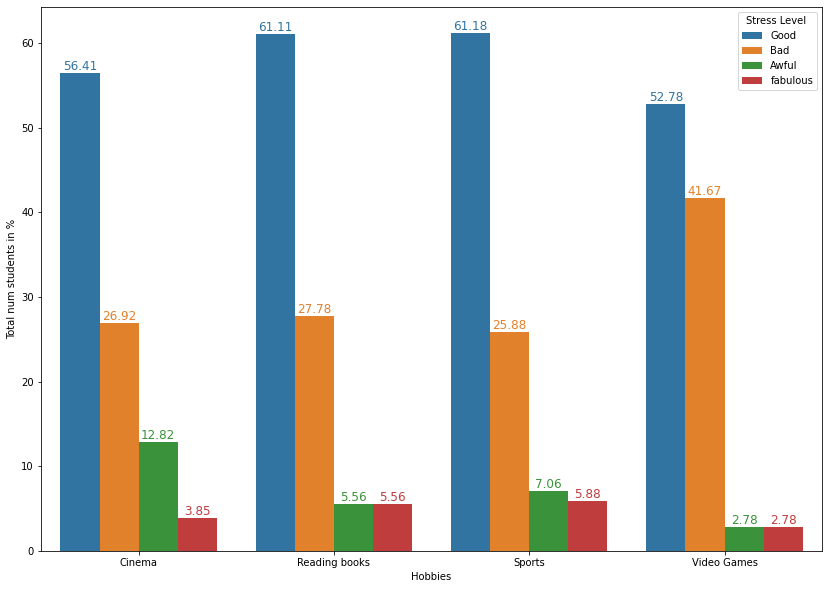

In [71]:
# plot barplot

fig, ax = plt.subplots(figsize =(14,10))
sns.barplot(x="Hobbies",
           y="Total num students in %",
           hue="Stress Level ",
           data=df_7_4_gb)
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

## Est-ce que les étudiants qui travaillent sont plus stressés?

In [1149]:
df_7_5 = df[['Stress Level ', 'Working part-time']].value_counts().to_frame().reset_index()
df_7_5.rename(columns= col_nm_7_3, inplace= True)
df_7_5.reset_index(drop=True, inplace=True)


df_7_5_working = df_7_5[df_7_5['Working part-time'] == 'Yes']
df_7_5_working.reset_index(drop=True, inplace=True)
df_7_5_working['Total num students'].sum()

rep_7_5_working_perc = []
for x in df_7_5_working['Total num students']:
    y = x / df_7_5_working['Total num students'].sum()*100
    rep_7_5_working_perc.append(round((y),2))

df_7_5_working['Total num students in %'] = rep_7_5_working_perc
res_7_5_a = df_7_5_working['Total num students in %'][3] +df_7_5_working['Total num students in %'][0]

/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/1901212439.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7_5_working['Total num students in %'] = rep_7_5_working_perc


In [1150]:
df_7_5_not_working = df_7_5[df_7_5['Working part-time'] == 'No']
df_7_5_not_working.reset_index(drop=True, inplace=True)
df_7_5_not_working

rep_7_5_not_working_perc = []
for x in df_7_5_not_working['Total num students']:
    y = x / df_7_5_not_working['Total num students'].sum()*100
    rep_7_5_not_working_perc.append(round((y),2))

df_7_5_not_working['Total num students in %'] = rep_7_5_not_working_perc
res_7_5_b = df_7_5_not_working['Total num students in %'][3] +df_7_5_not_working['Total num students in %'][0]

/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/1028830306.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7_5_not_working['Total num students in %'] = rep_7_5_not_working_perc


In [1157]:
print(f"{res_7_5_a}% de la population qui travaille n'est pas stressée contre {res_7_5_b}% d'étudiants non-stressés \nqui ne travaillent pas."
      f"\nNous pouvons donc en conclure que ceux qui travaillent sont un légèrement plus stressés que leurs vis-à-vis.")

60.98% de la population qui travaille n'est pas stressée contre 63.4% d'étudiants non-stressés 
qui ne travaillent pas.
Nous pouvons donc en conclure que ceux qui travaillent sont un légèrement plus stressés que leurs vis-à-vis.


# Quel est le temps de trajet moyen?

In [81]:
df_8= df['Travelling Time '].value_counts()
col_nm_8 = {'index':'Travelling Time', 'Travelling Time ': 'Total num of students'}

In [95]:
# #create a dataframe with a scatter plot or a box plot to see where our data skewes 


df_8 = df['Travelling Time '].value_counts().to_frame().reset_index()
df_8.rename(columns= col_nm_8, inplace= True)
df_8 = df_8.sort_values(by = ['Travelling Time'])
df_8 = df_8.reindex([1,0,2,3,4,6,5])
df_8.reset_index(drop=True, inplace=True)
print(df_8)

liste_valeurs_8= []

for x in df_8['Total num of students']:
    liste_valeurs_8.append(x)

liste_valeurs_8_tt = []
for x in df_8['Travelling Time']:
    liste_valeurs_8_tt.append(x)

    Travelling Time  Total num of students
0    0 - 30 minutes                     55
1   30 - 60 minutes                     80
2     1 - 1.30 hour                     51
3     1.30 - 2 hour                     18
4     2 - 2.30 hour                     14
5     2.30 - 3 hour                      7
6  more than 3 hour                     10


### Pourcentage des élèves arrivant à différentes plages horaires

In [105]:
liste_valeurs_8

rep_8 = []
for x in liste_valeurs_8:
    y = x / (tot_fem_num + tot_male_num) *100
    rep_8.append(f"{round((y),2)}% des élèves mettent")
    
rep_8
    
for i in range(0,7):
    print(f"{rep_8[i]} entre {liste_valeurs_8_tt[i]} pour arriver à l'université.")


23.4% des élèves mettent entre 0 - 30 minutes pour arriver à l'université.
34.04% des élèves mettent entre 30 - 60 minutes pour arriver à l'université.
21.7% des élèves mettent entre 1 - 1.30 hour pour arriver à l'université.
7.66% des élèves mettent entre 1.30 - 2 hour pour arriver à l'université.
5.96% des élèves mettent entre 2 - 2.30 hour pour arriver à l'université.
2.98% des élèves mettent entre 2.30 - 3 hour pour arriver à l'université.
4.26% des élèves mettent entre more than 3 hour pour arriver à l'université.


In [1217]:
trajet_med_list = []

for y in df['Travelling Time ']:
    if y == '0 - 30 minutes':
        trajet_med_list.append(15)
    if y == '30 - 60 minutes':
         trajet_med_list.append(45)
    if y == '1 - 1.30 hour':
         trajet_med_list.append(75)
    if y == '1.30 - 2 hour':
         trajet_med_list.append(105)
    if y == '2 - 2.30 hour':
         trajet_med_list.append(135)
    if y == '2.30 - 3 hour':
         trajet_med_list.append(165)
    if y == 'more than 3 hour':
         trajet_med_list.append(195)

trajet_max_list = []

for y in df['Travelling Time ']:
    if y == '0 - 30 minutes':
        trajet_max_list.append(30)
    if y == '30 - 60 minutes':
         trajet_max_list.append(60)
    if y == '1 - 1.30 hour':
         trajet_max_list.append(90)
    if y == '1.30 - 2 hour':
         trajet_max_list.append(120)
    if y == '2 - 2.30 hour':
         trajet_max_list.append(150)
    if y == '2.30 - 3 hour':
         trajet_max_list.append(180)
    if y == 'more than 3 hour':
         trajet_max_list.append(210)

trajet_min_list = []

for y in df['Travelling Time ']:
    if y == '0 - 30 minutes':
        trajet_min_list.append(0)
    if y == '30 - 60 minutes':
         trajet_min_list.append(30)
    if y == '1 - 1.30 hour':
         trajet_min_list.append(60)
    if y == '1.30 - 2 hour':
         trajet_min_list.append(90)
    if y == '2 - 2.30 hour':
         trajet_min_list.append(120)
    if y == '2.30 - 3 hour':
         trajet_min_list.append(150)
    if y == 'more than 3 hour':
         trajet_min_list.append(180)
            
len(trajet_max_list)

df['Min Travel Time'] = trajet_min_list
df['Med Travel Time'] = trajet_med_list
df['Max Travel Time'] = trajet_max_list
df 
df['Min Travel Time'].sum()/235 

df['Max Travel Time'].sum()/235 

df['Med Travel Time'].sum()/235 

res_8 = round((df['Min Travel Time'].sum()/235 + df['Max Travel Time'].sum()/235 + df['Med Travel Time'].sum()/235 ) / 3)

print(f"Pour trouver ce temps j'ai divisé les plages horaires en temps minimum, medium et maximum \n(donnant 3 valeurs quantitatives) et je les ai attribuées"
     f" aux élèves concernés. \nJ'ai pris les totaux  de chaque catégories et je les ai divisés par le nombre de" 
      f" notre échantillon et ensuite \nj'ai divisé la somme des 3 résultats par 3.")



Pour trouver ce temps j'ai divisé les plages horaires en temps minimum, medium et maximum 
(donnant 3 valeurs quantitatives) et je les ai attribuées aux élèves concernés. 
J'ai pris les totaux  de chaque catégories et je les ai divisés par le nombre de notre échantillon et ensuite 
j'ai divisé la somme des 3 résultats par 3.


In [1184]:
print(f"Le temps de trajet moyen de notre échantillon est de {res_8} min. "
      f"Cela reste cohésif avec les résultats dans 8.0.1 où près de 80% des élèves mettent entre 0-90min pour arriver.")

Le temps de trajet moyen de notre échantillon est de 64 min. Cela reste cohésif avec les résultats dans 8.0.1 où près de 80% des élèves mettent entre 0-90min pour arriver.


##  A-t-il un impacte sur les notes?

In [108]:
df[['Travelling Time ', 'College Mark']].value_counts()

Travelling Time   College Mark
30 - 60 minutes   70.00           14
0 - 30 minutes    70.00           12
1 - 1.30 hour     60.00           11
30 - 60 minutes   80.00           10
0 - 30 minutes    60.00            9
1 - 1.30 hour     80.00            8
30 - 60 minutes   75.00            7
                  85.00            7
                  60.00            6
0 - 30 minutes    80.00            6
2 - 2.30 hour     80.00            5
30 - 60 minutes   50.00            5
                  65.00            5
0 - 30 minutes    75.00            5
1 - 1.30 hour     65.00            4
1.30 - 2 hour     80.00            4
1 - 1.30 hour     50.00            4
                  75.00            4
                  70.00            4
30 - 60 minutes   90.00            4
0 - 30 minutes    65.00            4
                  90.00            4
1.30 - 2 hour     50.00            3
1 - 1.30 hour     89.00            3
30 - 60 minutes   68.00            3
1 - 1.30 hour     85.00            3
0 - 30 

In [138]:
# i tried groupby with my new df and the results were wrong
# print(df_8_3.groupby(['Travelling Time '])['College Mark'].mean()) (this is wrong)
# print(df_8_3.groupby(['Travelling Time '])['College Mark'].sum()) (this is wrong)

#this is how i found out
#df_8_3_test = df_8_3[df_8_3['Travelling Time '] == '0 - 30 minutes']#['College Mark'] * df_8_3['Total num students']
#(df_8_3_test['College Mark'] * df_8_3_test['Total num students']).sum()

#this is the correct answer
round(df.groupby(['Travelling Time '])['College Mark'].mean(),2)
#print(df.groupby(['Travelling Time '])['College Mark'].sum())



Travelling Time 
0 - 30 minutes      73.35
1 - 1.30 hour       65.37
1.30 - 2 hour       70.85
2 - 2.30 hour       73.79
2.30 - 3 hour       69.29
30 - 60 minutes     71.68
more than 3 hour    71.00
Name: College Mark, dtype: float64

In [1186]:
df_8_3_a = round(df.groupby(['Travelling Time '])['College score'].mean(),2).to_frame().reset_index()
#df_8_3_a.rename(columns= col_nm_7_3, inplace= True)
#df_8_3 = df_8_3.sort_values(by = ['Travelling Time '])
df_8_3_a = df_8_3_a.reindex([0,5,1,2,3,4,6])
df_8_3_a.reset_index(drop=True, inplace=True)
print(df_8_3_a, '\n')

print(f"Les résultats démontrent qu'il n'y a pas forcément de correlation pour ceux qui mettent\nplus de temps à voyager et leurs notes")

   Travelling Time   College score
0    0 - 30 minutes          73.35
1   30 - 60 minutes          71.68
2     1 - 1.30 hour          65.37
3     1.30 - 2 hour          70.85
4     2 - 2.30 hour          73.79
5     2.30 - 3 hour          69.29
6  more than 3 hour          71.00 

Les résultats démontrent qu'il n'y a pas forcément de correlation pour ceux qui mettent
plus de temps à voyager et leurs notes


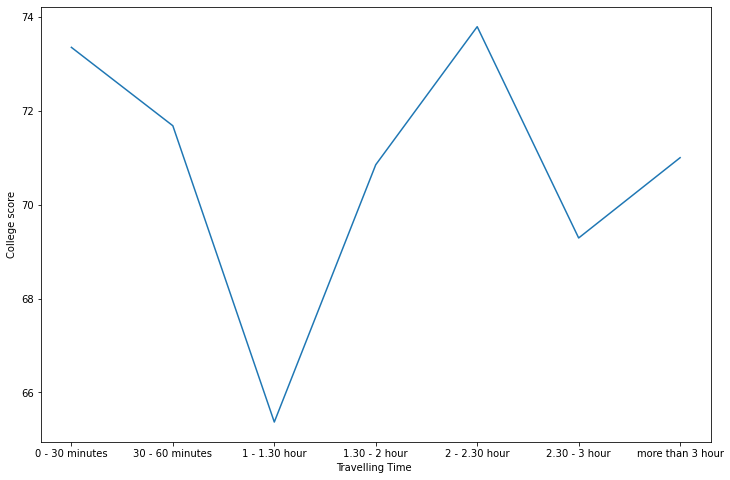

Si correlation il y avait entre le temps de trajet et les notes, 
notre courbe (qui est en dents de scie) serait linéaire et ascendante
ou descendante, ce qui n'est pas notre cas.


In [1193]:
#draw a plot with lines to see that it doesn't go down as time travelling goes up
fig, ax = plt.subplots(figsize =(12,8))
# plotting a single line graph
sns.lineplot(x="Travelling Time ", y="College score", data=df_8_3_a)
  
# displaying the plot
plt.show()

print(f"Si correlation il y avait entre le temps de trajet et les notes, \nnotre courbe (qui est en dents de scie) serait linéaire et ascendante\nou descendante, ce qui n'est pas notre cas.")

In [1195]:
df_8_3 = df[['Travelling Time ', 'College score']].value_counts().to_frame().reset_index()
df_8_3.rename(columns= col_nm_7_3, inplace= True)
df_8_3 = df_8_3.sort_values(by = ['Travelling Time '])
df_8_3.reset_index(drop=True, inplace=True)


## A-t-il un impacte sur le stress?

In [224]:
df_8_4 = df[['Travelling Time ', 'Stress Level ']].value_counts().to_frame().reset_index() 
df_8_4.rename(columns= col_nm_7_3, inplace= True)
df_8_4 = df_8_4.sort_values(by = ['Travelling Time '])
#df_8_4 = df_8_4.reindex([1,0,2,3,4,6,5])
df_8_4.reset_index(drop=True, inplace=True)
df_8_4 = df_8_4.reindex([0,1,2,3,4,6,7,5,8,9,10,12,14,13,11,17,15,16,18,19,21,20,22,23])
df_8_4 = df_8_4.reindex([0,1,2,3,18,20,21,19,4,5,6,8,10,9,7,13,11,12,14,15,17,16,22,23])
df_8_4.reset_index(drop=True, inplace=True)
print(df_8_4)

#df[['Travelling Time ', 'Stress Level ']].value_counts().to_frame().reset_index() 

#j'ai vu que la condition travelling time 'more than 3 hour' ne contenait pas de stress level 'awful' et 'fabulous'
#donc j'ai vite jeté un aperçu pour voir s'il n'y avait pas d'erreur 
#df[df['Travelling Time '] == '2 - 2.30 hour']

liste_valeurs_8_4= []

for x in df_8_4['Total num students']:
    liste_valeurs_8_4.append(x)

    Travelling Time  Stress Level   Total num students
0     0 - 30 minutes          Good                  33
1     0 - 30 minutes           Bad                  11
2     0 - 30 minutes         Awful                   7
3     0 - 30 minutes      fabulous                   4
4    30 - 60 minutes          Good                  43
5    30 - 60 minutes           Bad                  28
6    30 - 60 minutes         Awful                   5
7    30 - 60 minutes      fabulous                   4
8      1 - 1.30 hour          Good                  34
9      1 - 1.30 hour           Bad                  15
10     1 - 1.30 hour         Awful                   2
11     1.30 - 2 hour          Good                  13
12     1.30 - 2 hour           Bad                   3
13     1.30 - 2 hour         Awful                   1
14     1.30 - 2 hour      fabulous                   1
15     2 - 2.30 hour          Good                   5
16     2 - 2.30 hour           Bad                   7
17     2 -

In [241]:
tot_tt_30 = df_8_4['Total num students'][0:4].sum()
tot_tt_60 = df_8_4['Total num students'][4:8].sum()
tot_tt_90 = df_8_4['Total num students'][8:11].sum()
tot_tt_120 = df_8_4['Total num students'][11:15].sum()
tot_tt_150 = df_8_4['Total num students'][15:18].sum()
tot_tt_180 = df_8_4['Total num students'][18:22].sum()
tot_tt_max = df_8_4['Total num students'][22:24].sum()
#pourcentage des étudiants sur la population totale BCom finance

rep_8_4 = []

for val in liste_valeurs_8_4[0:4]:
    w = val / tot_tt_30 *100
    rep_8_4.append(round((w),2))

#pourcentage des étudiants sur la population totale BCom ism

for val in liste_valeurs_8_4[4:8]:
    y = val / tot_tt_60 *100
    rep_8_4.append(round((y),2))

#pourcentage des étudiants sur la population totale BCA   
for val in liste_valeurs_8_4[8:11]:
    z = val / tot_tt_90 *100
    rep_8_4.append(round((z),2))

#pourcentage des étudiants sur la population totale Com   
for val in liste_valeurs_8_4[11:15]:
    v = val / tot_tt_120 *100
    rep_8_4.append(round((v),2))
    
for val in liste_valeurs_8_4[15:18]:
    a = val / tot_tt_150 *100
    rep_8_4.append(round((a),2))

for val in liste_valeurs_8_4[18:22]:
    b = val / tot_tt_180 *100
    rep_8_4.append(round((b),2))
    
for val in liste_valeurs_8_4[22:24]:
    c = val / tot_tt_max *100
    rep_8_4.append(round((c),2))

    
rep_8_4

df_8_4['Total num students in %'] = rep_8_4
df_8_4.info()

#here i encountered an issue with the values and that is because of type due to print(f")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Travelling Time          24 non-null     object 
 1   Stress Level             24 non-null     object 
 2   Total num students       24 non-null     int64  
 3   Total num students in %  24 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 896.0+ bytes


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


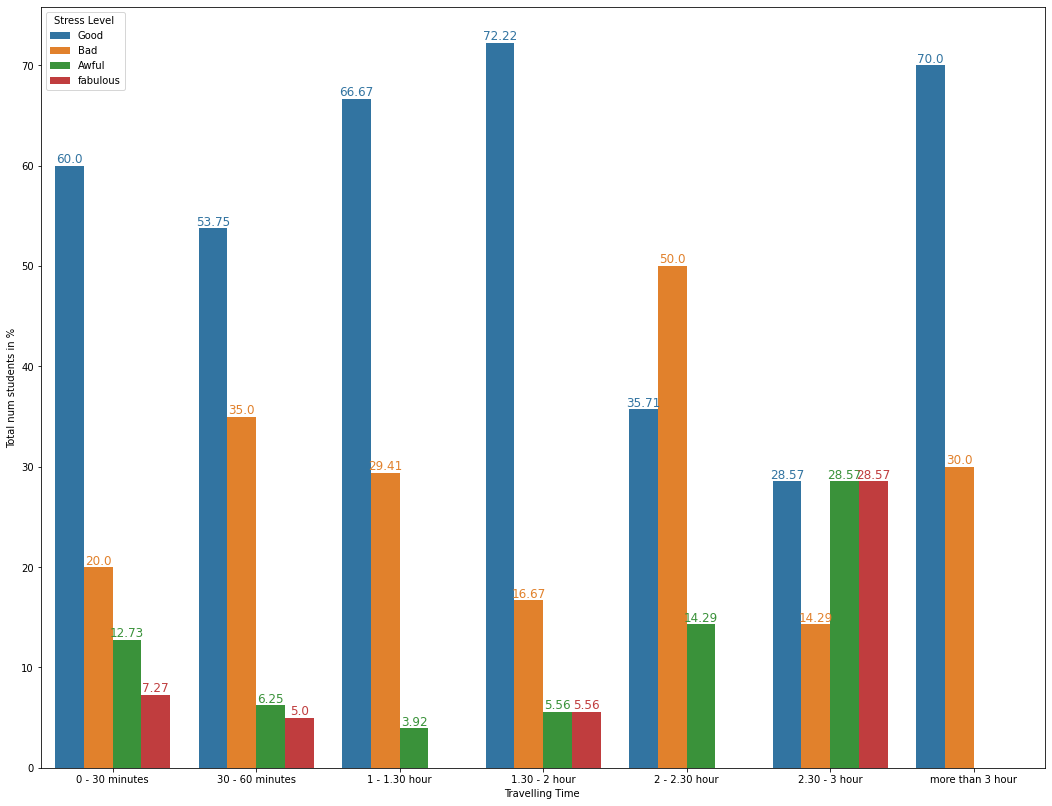

In [245]:
# plot barplot

fig, ax = plt.subplots(figsize =(18,14))
sns.barplot(x="Travelling Time ", 
            y="Total num students in %",
           hue="Stress Level ",
           data=df_8_4)
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

In [1202]:
print(f"D'après notre échantillon, le temps de trajet n'a pas d'effet négatif."
      f"\nNous retrouvons un peu cette courbe en dents de scie."
      f"\nIl est possible que les longs trajets soient assez communs.")

D'après notre échantillon, le temps de trajet n'a pas d'effet négatif.
Nous retrouvons un peu cette courbe en dents de scie.
Il est possible que les longs trajets soient assez communs.


# Les notes de Seconde(10th grade) et de Terminale (12th grade) reflètent-elles les notes de l'Université?

In [338]:
#df_9['Grade 12th - 10th'] = df['12th grade score'] - df['10th grade score'] 
# df['10th grade score'] - df['College Mark']
#df_9['Score (College - 12th)'] = df['College Mark'] - df['12th grade score']

mean_grade10_12 = (df['10th grade score'] + df['12th grade score']) /2

df_9['HS_mean'] = df['College Mark'] - mean_grade10_12

#df_9['Score (College - 12th)'] 

/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/1621613056.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9['HS_mean'] = df['College Mark'] - mean_grade10_12


In [295]:
df_9 = df[['Gender','10th grade score', '12th grade score', 'College Mark']]
df_9['Grade (12th - 10th)'] = df['12th grade score'] - df['10th grade score'] 
print(df_9[(df_9['Grade (12th - 10th)'] < 0) & (df_9['Gender'] == 'Female')].mean()) 
print(df_9[(df_9['Grade (12th - 10th)'] < 0) & (df_9['Gender'] == 'Male')].mean()) 


10th grade score       83.463158
12th grade score       70.052632
College Mark           77.070175
Grade (12th - 10th)   -13.410526
dtype: float64
10th grade score       80.121622
12th grade score       66.105946
College Mark           68.857027
Grade (12th - 10th)   -14.015676
dtype: float64


/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/3951649554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9['Grade (12th - 10th)'] = df['12th grade score'] - df['10th grade score']
/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/3951649554.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_9[(df_9['Grade (12th - 10th)'] < 0) & (df_9['Gender'] == 'Female')].mean())
/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/3951649554.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_on

In [ ]:
First see the difference between 10th and 12th year and possibly divide by gender
then see the difference between 12th and college
can also comment on 10th & college mark and see if the grades go up compared to 12th year 
and see if the department has something to do with it 

## Par genre

In [384]:
print('HS MEAN SCORES PER GENDER')
print('Female')
print(df_9_2.groupby([df_9_2['Gender'] == 'Female' ])['HS mean'].mean()[1],'\n')
print('Male')
print(df_9_2.groupby([df_9_2['Gender'] == 'Male' ])['HS mean'].mean()[1],'\n''\n''\n')

print("'SCORE COLLEGE - 12TH' PER GENDER")
print('Female')
print(df_9_2.groupby([df_9_2['Gender'] == 'Female' ])['Score (College - 12th)'].mean()[1],'\n')
print('Male')
print(df_9_2.groupby([df_9_2['Gender'] == 'Male' ])['Score (College - 12th)'].mean()[1],'\n''\n''\n')


print("'SCORE COLLEGE - 10TH' PER GENDER")
print('Female')
print(df_9_2.groupby([df_9_2['Gender'] == 'Female' ])['Grade (College - 10th)'].mean()[1],'\n')
print('Male')
print(df_9_2.groupby([df_9_2['Gender'] == 'Male' ])['Grade (College - 10th)'].mean()[1])

HS MEAN SCORES PER GENDER
Female
1.1044303797468353 

Male
-4.0124038461538465 



'SCORE COLLEGE - 12TH' PER GENDER
Female
5.1556962025316455 

Male
0.22179487179487195 



'SCORE COLLEGE - 10TH' PER GENDER
Female
-2.946835443037975 

Male
-8.246602564102565


       10th grade score
count        235.000000
mean          77.125532
std           12.233949
min           40.000000
25%           70.000000
50%           80.000000
75%           86.250000
max           98.000000
AxesSubplot(0.125,0.125;0.775x0.755)


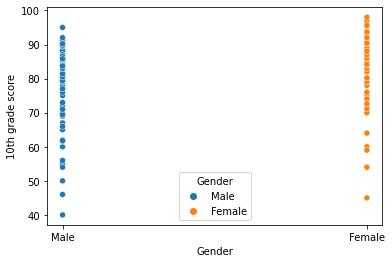

In [278]:
print(df[['10th grade score','Gender']].describe())

print(sns.scatterplot(x="Gender", y="10th grade score", hue = "Gender", data=df[['10th grade score','Gender']].value_counts()))






AxesSubplot(0.125,0.125;0.775x0.755)


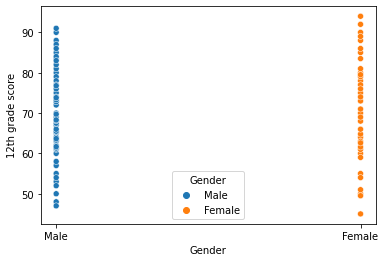

In [274]:
print(sns.scatterplot(x="Gender", y="12th grade score", hue = "Gender", data=df[['12th grade score','Gender']].value_counts()))




AxesSubplot(0.125,0.125;0.775x0.755)


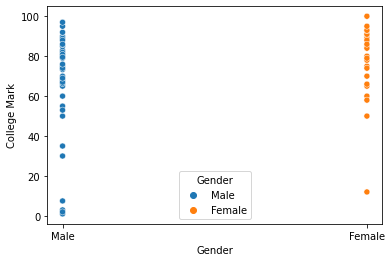

In [275]:
print(sns.scatterplot(x="Gender", y="College Mark", hue = "Gender", data=df[['College Mark','Gender']].value_counts()))




## Par filière

In [381]:
df_9_2 = df[['Gender','10th grade score', '12th grade score', 'College Mark', 'Department']]
#df_9['Grade 12th - 10th'] = df['12th grade score'] - df['10th grade score'] 
# df['10th grade score'] - df['College Mark']
#df_9['Score (College - 12th)'] = df['College Mark'] - df['12th grade score']

mean_grade10_12 = (df['10th grade score'] + df['12th grade score']) /2

df_9_2['Score (College - 12th)']=df_9['Score (College - 12th)']
df_9_2['HS mean'] = df_9['HS_mean']
df_9_2['Grade (12th - 10th)'] = df_9['Grade 12th - 10th']
df_9_2['Grade (College - 10th)'] = df_9_2['College Mark'] - df_9_2['10th grade score']

/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/3468781585.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9_2['Score (College - 12th)']=df_9['Score (College - 12th)']
/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/3468781585.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_9_2['HS mean'] = df_9['HS_mean']
/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/3468781585.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [361]:
df_9_2['HS mean'].mean()

df_9_2.groupby([df_9_2['Department'] == 'BCA' ])['HS mean'].mean()


Department
False   -2.136748
True    -2.413636
Name: HS mean, dtype: float64

In [393]:
print('***HS MEAN SCORES***','\n')

print('Bcom Acc')
print(round(df_9_2.groupby([df_9_2['Department'] == 'BCA' ])['HS mean'].mean(),2)[1],'\n')
print('Bcom ISM')
print(round(df_9_2.groupby([df_9_2['Department'] == 'Commerce' ])['HS mean'].mean(),2)[1],'\n')
print('BCA')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com Accounting and Finance ' ])['HS mean'].mean(),2)[1],'\n')
print('Commerce')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com ISM' ])['HS mean'].mean(),2)[1],'\n''\n''\n')

print('***GRADE 12 SCORES***','\n')
print('Bcom Acc')
print(round(df_9_2.groupby([df_9_2['Department'] == 'BCA' ])['Score (College - 12th)'].mean(),2)[1],'\n')
print('Bcom ISM')
print(round(df_9_2.groupby([df_9_2['Department'] == 'Commerce' ])['Score (College - 12th)'].mean(),2)[1],'\n')
print('BCA')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com Accounting and Finance ' ])['Score (College - 12th)'].mean(),2)[1],'\n')
print('Commerce')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com ISM' ])['Score (College - 12th)'].mean(),2)[1],'\n''\n''\n')

print('***GRADE 10 SCORES***','\n')
print('Bcom Acc')
print(round(df_9_2.groupby([df_9_2['Department'] == 'BCA' ])['Grade (College - 10th)'].mean(),2)[1],'\n')
print('Bcom ISM')
print(round(df_9_2.groupby([df_9_2['Department'] == 'Commerce' ])['Grade (College - 10th)'].mean(),2)[1],'\n')
print('BCA')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com Accounting and Finance ' ])['Grade (College - 10th)'].mean(),2)[1],'\n')
print('Commerce')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com ISM' ])['Grade (College - 10th)'].mean(),2)[1])

***HS MEAN SCORES*** 

Bcom Acc
-2.41 

Bcom ISM
-0.05 

BCA
-8.2 

Commerce
-3.36 



***GRADE 12 SCORES*** 

Bcom Acc
3.71 

Bcom ISM
2.95 

BCA
-10.1 

Commerce
-2.61 



***GRADE 10 SCORES*** 

Bcom Acc
-8.53 

Bcom ISM
-3.06 

BCA
-6.29 

Commerce
-4.11


In [439]:
print("Moyenne des notes cumulées moins la note d'université: par filière et par genre féminin", '\n')
print('Bcom Acc')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com Accounting and Finance ', df_9_2['Gender'] == 'Female'])['HS mean'].mean()[1][1],2),'\n')
print('Bcom ISM')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com ISM', df_9_2['Gender'] == 'Female'])['HS mean'].mean(),2)[1][1],'\n')
print('BCA')
print(round(df_9_2.groupby([df_9_2['Department'] == 'BCA', df_9_2['Gender'] == 'Female'])['HS mean'].mean(),2)[1][1],'\n')
print('Commerce')
print(round(df_9_2.groupby([df_9_2['Department'] == 'Commerce', df_9_2['Gender'] == 'Female'])['HS mean'].mean(),2)[1][1],'\n''\n''\n')


print("Moyenne des notes cumulées moins la note d'université: par filière et par genre masculin", '\n')

print('Bcom Acc')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com Accounting and Finance ', df_9_2['Gender'] == 'Male'])['HS mean'].mean()[1][1],2),'\n')
print('Bcom ISM')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com ISM', df_9_2['Gender'] == 'Male'])['HS mean'].mean(),2)[1][1],'\n')
print('BCA')
print(round(df_9_2.groupby([df_9_2['Department'] == 'BCA', df_9_2['Gender'] == 'Male'])['HS mean'].mean(),2)[1][1],'\n')
print('Commerce')
print(round(df_9_2.groupby([df_9_2['Department'] == 'Commerce', df_9_2['Gender'] == 'Male'])['HS mean'].mean(),2)[1][1],'\n''\n''\n')






print('*****************','\n''\n''\n')

print("Note de 10th grade moins la note d'université: par filière et par genre féminin", '\n')
print('Bcom Acc')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com Accounting and Finance ', df_9_2['Gender'] == 'Female'])['Grade (College - 10th)'].mean()[1][1],2),'\n')
print('Bcom ISM')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com ISM', df_9_2['Gender'] == 'Female'])['Grade (College - 10th)'].mean(),2)[1][1],'\n')
print('BCA')
print(round(df_9_2.groupby([df_9_2['Department'] == 'BCA', df_9_2['Gender'] == 'Female'])['Grade (College - 10th)'].mean(),2)[1][1],'\n')
print('Commerce')
print(round(df_9_2.groupby([df_9_2['Department'] == 'Commerce', df_9_2['Gender'] == 'Female'])['Grade (College - 10th)'].mean(),2)[1][1],'\n''\n''\n')


print("Note de 10th grade moins la note d'université: par filière et par genre masculin", '\n')

print('Bcom Acc')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com Accounting and Finance ', df_9_2['Gender'] == 'Male'])['Grade (College - 10th)'].mean()[1][1],2),'\n')
print('Bcom ISM')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com ISM', df_9_2['Gender'] == 'Male'])['Grade (College - 10th)'].mean(),2)[1][1],'\n')
print('BCA')
print(round(df_9_2.groupby([df_9_2['Department'] == 'BCA', df_9_2['Gender'] == 'Male'])['Grade (College - 10th)'].mean(),2)[1][1],'\n')
print('Commerce')
print(round(df_9_2.groupby([df_9_2['Department'] == 'Commerce', df_9_2['Gender'] == 'Male'])['Grade (College - 10th)'].mean(),2)[1][1],'\n''\n''\n')









print('***************', '\n''\n''\n')

print("Note de 12th grade moins la note d'université: par filière et par genre féminin", '\n')
print('Bcom Acc')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com Accounting and Finance ', df_9_2['Gender'] == 'Female'])['Score (College - 12th)'].mean()[1][1],2),'\n')
print('Bcom ISM')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com ISM', df_9_2['Gender'] == 'Female'])['Score (College - 12th)'].mean(),2)[1][1],'\n')
print('BCA')
print(round(df_9_2.groupby([df_9_2['Department'] == 'BCA', df_9_2['Gender'] == 'Female'])['Score (College - 12th)'].mean(),2)[1][1],'\n')
print('Commerce')
print(round(df_9_2.groupby([df_9_2['Department'] == 'Commerce', df_9_2['Gender'] == 'Female'])['Score (College - 12th)'].mean(),2)[1][1],'\n''\n''\n')


print("Note de 12th grade moins la note d'université: par filière et par genre masculin", '\n')

print('Bcom Acc')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com Accounting and Finance ', df_9_2['Gender'] == 'Male'])['Score (College - 12th)'].mean()[1][1],2),'\n')
print('Bcom ISM')
print(round(df_9_2.groupby([df_9_2['Department'] == 'B.com ISM', df_9_2['Gender'] == 'Male'])['Score (College - 12th)'].mean(),2)[1][1],'\n')
print('BCA')
print(round(df_9_2.groupby([df_9_2['Department'] == 'BCA', df_9_2['Gender'] == 'Male'])['Score (College - 12th)'].mean(),2)[1][1],'\n')
print('Commerce')
print(round(df_9_2.groupby([df_9_2['Department'] == 'Commerce', df_9_2['Gender'] == 'Male'])['Score (College - 12th)'].mean(),2)[1][1],'\n''\n''\n')






Moyenne des notes cumulées moins la note d'université: par filière et par genre féminin 

Bcom Acc
-11.57 

Bcom ISM
2.5 

BCA
2.43 

Commerce
1.7 



Moyenne des notes cumulées moins la note d'université: par filière et par genre masculin 

Bcom Acc
-5.94 

Bcom ISM
-4.95 

BCA
-4.37 

Commerce
-1.69 



***************** 



Note de 10th grade moins la note d'université: par filière et par genre féminin 

Bcom Acc
-8.57 

Bcom ISM
4.17 

BCA
-3.42 

Commerce
-2.64 



Note de 10th grade moins la note d'université: par filière et par genre masculin 

Bcom Acc
-4.78 

Bcom ISM
-6.36 

BCA
-10.6 

Commerce
-3.44 



*************** 



Note de 12th grade moins la note d'université: par filière et par genre féminin 

Bcom Acc
-14.58 

Bcom ISM
0.83 

BCA
8.28 

Commerce
6.04 



Note de 12th grade moins la note d'université: par filière et par genre masculin 

Bcom Acc
-7.11 

Bcom ISM
-3.55 

BCA
1.86 

Commerce
0.06 





In [1223]:
print(f"Pour répondre à notre question, par rapport à la note de seconde, à part les femmes de la filière Bcom ISM"
      f"\ntout le mondre a fait beaucoup moins bien. En ce qui concerne la Terminale, les femmes font mieux dans 3 matières"
      f"\n(ISM, BCA & Commerce) et les hommes dans 2 (BCA & Commerce). En prenant la moyenne des deux années, les femmes" 
      f"\nperforment mieux en ISM, BCA et Commerce. Les hommes sont tous dans le négatif."
      f"\nPour conclure, si l'on se donne un STD de 5 points alors il n'y a que les élèves de Bcom ACC, tous genres confondus,"
      f"\ndont les notes ne reflètent pas leurs notes dans le secondaire.")
      
      
      
      
      
      
      

Pour répondre à notre question, par rapport à la note de seconde, à part les femmes de la filière Bcom ISM
tout le mondre a fait beaucoup moins bien. En ce qui concerne la Terminale, les femmes font mieux dans 3 matières
(ISM, BCA & Commerce) et les hommes dans 2 (BCA & Commerce). En prenant la moyenne des deux années, les femmes
performent mieux en ISM, BCA et Commerce. Les hommes sont tous dans le négatif.
Pour conclure, si l'on se donne un STD de 5 points alors il n'y a que les élèves de Bcom ACC, tous genres confondus,
dont les notes ne reflètent pas leurs notes dans le secondaire.


In [441]:
df_9_new = pd.DataFrame({
    
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    
    'Department': ['B.com Accounting and Finance','B.com Accounting and Finance', 'B.com ISM', 'B.com ISM', 'BCA','BCA', 'Commerce','Commerce'],
    
    '(College - 10th) Score': [-8.57, -4.78, 4.17, -6.36, -3.42, -10.6, -2.64, -3.44],
                   
    '(College - 12th) Score': [-14.58, -7.11, 0.83, -3.55, 8.28, 1.86, 6.04, 0.06],
                   
    '(College - 10th & 12th) Score': [-11.57, -5.94, 2.5, -4.95, 2.43, -4.37, 1.7, -1.69],})

df_9_new

,Gender,Department,(College - 10th) Score,(College - 12th) Score,(College - 10th & 12th) Score
0,Female,B.com Accounting and Finance,-8.57,-14.58,-11.57
1,Male,B.com Accounting and Finance,-4.78,-7.11,-5.94
2,Female,B.com ISM,4.17,0.83,2.50
3,Male,B.com ISM,-6.36,-3.55,-4.95
4,Female,BCA,-3.42,8.28,2.43
5,Male,BCA,-10.60,1.86,-4.37
6,Female,Commerce,-2.64,6.04,1.70
7,Male,Commerce,-3.44,0.06,-1.69


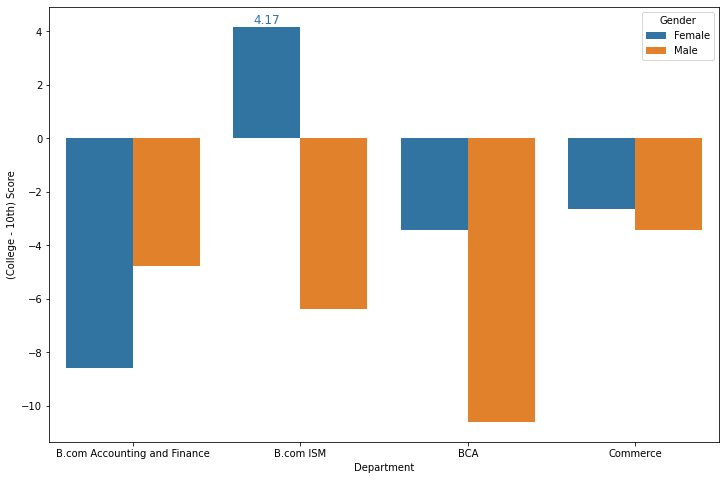

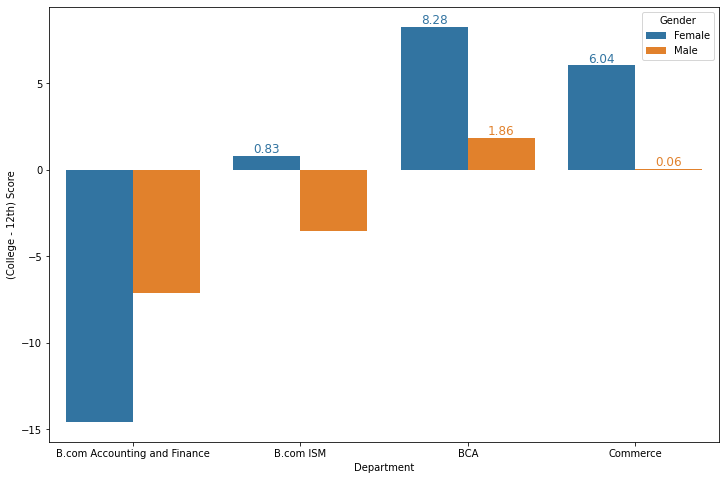

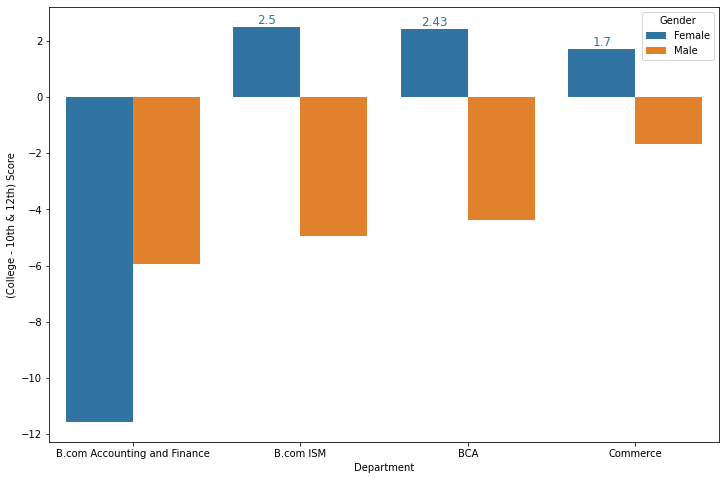

In [465]:
# plot barplot

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x="Department", 
            y="(College - 10th) Score",
           hue="Gender",
           data=df_9_new)
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
    
# plot barplot

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x="Department", 
            y="(College - 12th) Score",
           hue="Gender",
           data=df_9_new)
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)
    
# plot barplot

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x="Department", 
            y="(College - 10th & 12th) Score",
           hue="Gender",
           data=df_9_new)
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

In [346]:
# print('Bcom ACC')
# print((df_9_2[(df_9_2['HS mean'] < 0) & (df_9_2['Department'] == 'B.com Accounting and Finance ')].mean()),'\n')
# print('Bcom ISM')
# print((df_9_2[(df_9_2['HS mean'] < 0) & (df_9_2['Department'] == 'B.com ISM')].mean()) ,'\n')
# print('BCA')
# print((df_9_2[(df_9_2['HS mean'] < 0) & (df_9_2['Department'] == 'BCA')].mean()) ,'\n')
# print('Commerce')
# print(df_9_2[(df_9_2['HS mean'] < 0) & (df_9_2['Department'] == 'Commerce')].mean()) 

Bcom ACC
10th grade score          73.05000
12th grade score          78.68750
College Mark              55.00000
Score (College - 12th)   -23.68750
HS mean                  -20.86875
dtype: float64 

Bcom ISM
10th grade score          70.250000
12th grade score          67.416667
College Mark              54.333333
Score (College - 12th)   -13.083333
HS mean                  -14.500000
dtype: float64 

BCA
10th grade score          79.092308
12th grade score          69.147692
College Mark              62.704615
Score (College - 12th)    -6.443077
HS mean                  -11.415385
dtype: float64 

Commerce
10th grade score          83.231034
12th grade score          76.423103
College Mark              72.586207
Score (College - 12th)    -3.836897
HS mean                   -7.240862
dtype: float64


/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/2678679437.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print((df_9_2[(df_9_2['HS mean'] < 0) & (df_9_2['Department'] == 'B.com Accounting and Finance ')].mean()),'\n')
/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/2678679437.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print((df_9_2[(df_9_2['HS mean'] < 0) & (df_9_2['Department'] == 'B.com ISM')].mean()) ,'\n')
/var/folders/4y/3p248ngs2790s3zw19p7l4vc0000gn/T/ipykernel_53691/2678679437.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a 

# Quel est le taux moyen de satisfaction par rapport à la licence?

In [493]:
df['Do you like your degree?'].value_counts()

#moyenne des élèves satisfaits de leur choix de licence
print(f"{round(df['Do you like your degree?'].value_counts()[0] / len(df) *100,2)}% des éleves sont satisfaits de leur choix")
print(f"contre {round(df['Do you like your degree?'].value_counts()[1] / len(df) *100,2)}%")

91.49% des éleves sont satisfaits de leur choix
contre 8.51%


## Par genre

In [1294]:
df[['Gender', 'Do you like your degree?']].value_counts()

Gender  Do you like your degree?
Male    Yes                         142
Female  Yes                          73
Male    No                           14
Female  No                            6
dtype: int64

In [512]:
print(f"{round(df[['Gender', 'Do you like your degree?']].value_counts()[0] / tot_male_num *100,2)}% des hommes sont satisfaits de leur choix contre {round(df[['Gender', 'Do you like your degree?']].value_counts()[2] / tot_male_num *100,2)}%")
    
         
print(f"{round(df[['Gender', 'Do you like your degree?']].value_counts()[1] / tot_fem_num *100,2)}% des femmes sont satisfaites de leur choix contre {round(df[['Gender', 'Do you like your degree?']].value_counts()[3] / tot_fem_num *100,2)}%")        
         
         
print("\nCela reflètent le score général.")
         
         

91.03% des hommes sont satisfaits de leur choix contre 8.97%
92.41% des femmes sont satisfaites de leur choix contre 7.59%

Cela reflètent le score général.


## Par filière  

In [1393]:
df_10_2_a = df[['Department', 'Do you like your degree?']].value_counts().to_frame().reset_index().sort_values(by= ['Department'])

df_10_2_a.rename(columns= col_nm_7_3, inplace= True)
df_10_2_a.reset_index(drop=True, inplace=True)
df_10_2_a
#df_10_2[0] + df_10_2[3]

,Department,Do you like your degree?,Total num students
0,B.com Accounting and Finance,Yes,14
1,B.com Accounting and Finance,No,1
2,B.com ISM,Yes,26
3,B.com ISM,No,2
4,BCA,Yes,116
5,BCA,No,16
6,Commerce,Yes,59
7,Commerce,No,1


In [1394]:
df_10_2_a.loc[df_10_2_a['Department'] == 'BCA', 'Total num students']

4    116
5     16
Name: Total num students, dtype: int64

In [1395]:
liste_10_2_a = []

for x in df_10_2_a['Department']:
    y = df_10_2_a.loc[df_10_2_a['Department'] == x, 'Total num students'].sum()
    liste_10_2_a.append(y)

new_list_10_2_a = []
for i in range(0,8):
    c = df_10_2_a['Total num students'][i] / liste_10_2_a[i]*100
    new_list_10_2_a.append(round((c),2))
new_list_10_2_a

df_10_2_a['% per department'] = new_list_10_2_a

#df_10_2_a.drop('Students in each dept %', axis=1, inplace=True)
df_10_2_a

,Department,Do you like your degree?,Total num students,% per department
0,B.com Accounting and Finance,Yes,14,93.33
1,B.com Accounting and Finance,No,1,6.67
2,B.com ISM,Yes,26,92.86
3,B.com ISM,No,2,7.14
4,BCA,Yes,116,87.88
5,BCA,No,16,12.12
6,Commerce,Yes,59,98.33
7,Commerce,No,1,1.67


<AxesSubplot:xlabel='Department', ylabel='% per department'>

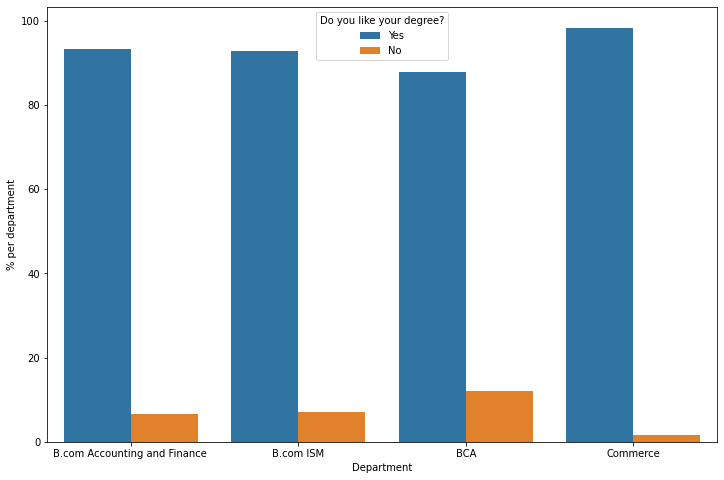

In [1396]:
# plot barplot

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x="Department", 
            y="% per department",
           hue="Do you like your degree?",
           data=df_10_2_a)

In [1342]:
#sum(df_10_2_a[0])
df_10_2_a['Department']

4    B.com Accounting and Finance 
6    B.com Accounting and Finance 
2                        B.com ISM
5                        B.com ISM
0                              BCA
3                              BCA
1                         Commerce
7                         Commerce
Name: Department, dtype: object

In [1297]:
# for x in df_10_2_a.iloc[0:4]:
#     print(x) 

df_10_2_a[df_10_2_a['Department'] == 'BCA']

,Department,Do you like your degree?,0
0,BCA,Yes,116
3,BCA,No,16


## Affecte-t-il les notes?

In [1401]:
df_10_3 = df.groupby(['Department', 'Do you like your degree?'])['College score'].mean().to_frame().reset_index()
df_10_3 


,Department,Do you like your degree?,College score
0,B.com Accounting and Finance,No,12.000000
1,B.com Accounting and Finance,Yes,71.928571
2,B.com ISM,No,50.000000
3,B.com ISM,Yes,60.000000
4,BCA,No,68.281250
5,BCA,Yes,70.145948
6,Commerce,No,80.000000
7,Commerce,Yes,78.250847


<AxesSubplot:xlabel='Department', ylabel='College score'>

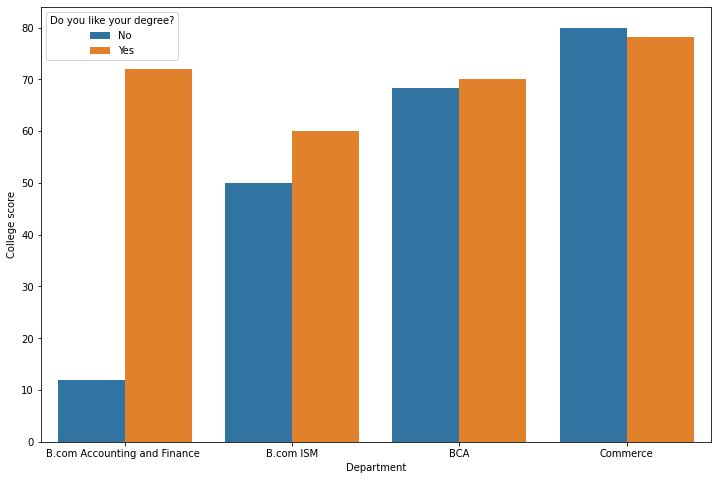

In [1402]:
# plot barplot

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x="Department", 
            y="College score",
           hue="Do you like your degree?",
           data=df_10_3)

## A-t-il un impacte sur les attentes salariales?

In [661]:
df_10_4= df.groupby(['Do you like your degree?'])['Salary expectation'].mean().to_frame().reset_index()

df_10_4

,Do you like your degree?,Salary expectation
0,No,25389.200000
1,Yes,22972.013953


In [1404]:
df_10_4_b= df.groupby(['Department', 'Do you like your degree?'])['Salary expectation'].mean().to_frame().reset_index()
df_10_4_b = df_10_4_b.sort_values(by = ['Department'])
df_10_4_b

,Department,Do you like your degree?,Salary expectation
0,B.com Accounting and Finance,No,30000.000000
1,B.com Accounting and Finance,Yes,36428.571429
2,B.com ISM,No,21142.000000
3,B.com ISM,Yes,25208.653846
4,BCA,No,26281.250000
5,BCA,Yes,22467.758621
6,Commerce,No,15000.000000
7,Commerce,Yes,19784.711864


In [1410]:
df_10_4_c = df.groupby(['Department', 'Do you like your degree?', 'Gender'])['Salary expectation'].mean().to_frame().reset_index()
df_10_4_c = df_10_4_c.sort_values(by = ['Department', 'Do you like your degree?'])
df_10_4_c_fem = df_10_4_c[df_10_4_c['Gender'] == 'Female']
df_10_4_c_men = df_10_4_c[df_10_4_c['Gender'] == 'Male']

<AxesSubplot:xlabel='Department', ylabel='Salary expectation'>

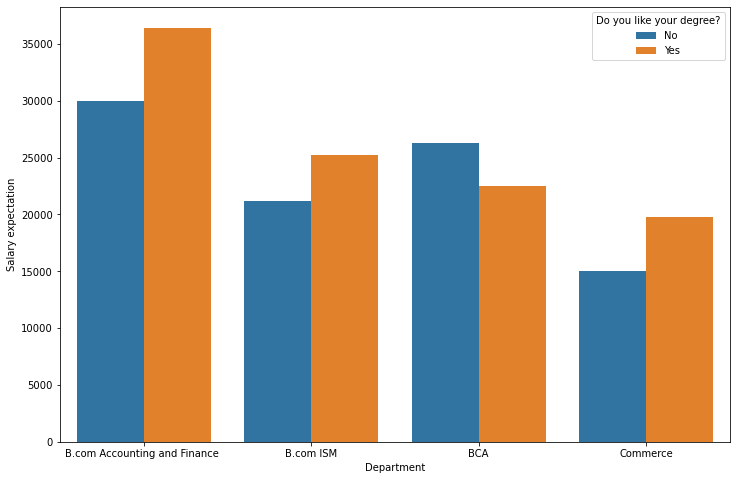

In [1407]:
# plot barplot

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x="Department", 
            y="Salary expectation",
           hue="Do you like your degree?",
           data=df_10_4_b)


In [667]:
df[(df['Gender']=='Female') & (df['Department'] == 'BCA') & (df['Do you like your degree?'] == 'No')]

,Gender,Height(CM),Weight(KG),Hobbies,Time on SMedia & VGames,10th grade score,12th grade score,Department,Certification (enrolled or completed),College Mark,Preferred study period,Daily studying time,Do you like your degree?,possibility of choosing their career based on their degree :,Salary expectation,Travelling Time,Working part-time,Financial Status,Stress Level,Financial category
3,Female,147.0,20.0,Reading books,1.30 - 2 hour,70.0,59.0,BCA,Yes,58.0,Anytime,1 - 2 Hour,No,50%,125000,0 - 30 minutes,No,good,Bad,60
72,Female,160.0,35.0,Cinema,1 - 30 Minute,87.0,75.0,BCA,No,89.0,Anytime,0 - 30 minute,No,25%,10000,1 - 1.30 hour,No,Bad,Good,30
86,Female,170.0,45.0,Cinema,More than 2 hour,75.0,64.0,BCA,Yes,74.0,Anytime,0 - 30 minute,No,25%,20000,0 - 30 minutes,No,good,Good,60


<AxesSubplot:xlabel='Department', ylabel='Salary expectation'>

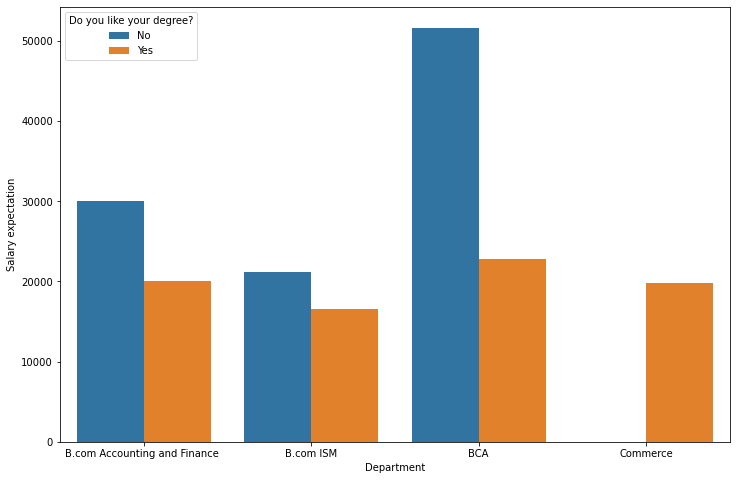

In [1411]:

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x="Department", 
            y="Salary expectation",
           hue="Do you like your degree?",
           data=df_10_4_c_fem)

<AxesSubplot:xlabel='Department', ylabel='Salary expectation'>

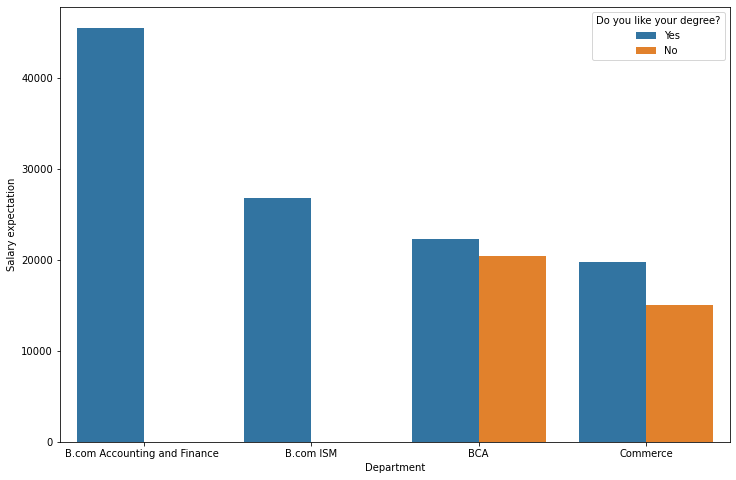

In [1412]:

fig, ax = plt.subplots(figsize =(12,8))
sns.barplot(x="Department", 
            y="Salary expectation",
           hue="Do you like your degree?",
           data=df_10_4_c_men)

In [1413]:
df_10_4_c_men


,Department,Do you like your degree?,Gender,Salary expectation
2,B.com Accounting and Finance,Yes,Male,45555.555556
5,B.com ISM,Yes,Male,26785.590909
7,BCA,No,Male,20423.076923
9,BCA,Yes,Male,22324.197531
10,Commerce,No,Male,15000.000000
12,Commerce,Yes,Male,19817.733333


In [1421]:
print("Dans les 3/4 des catégories, apprécier son choix de licence influe sur les attentes salariales. \nEn y regardant"
      "de plus près, si nous rajoutons le variable 'genre' cela reste véridique pour les hommes"
      "\nmais c'est le contraire dans 3 des 4 catégories 'département' en ce qui concerne les femmes.")
print("\nLa valeur de l'attente salariale de notre index 3 influe beaucoup sur le résultat df_10_4_b")

Dans les 3/4 des catégories, apprécier son choix de licence influe sur les attentes salariales. 
En y regardantde plus près, si nous rajoutons le variable 'genre' cela reste véridique pour les hommes
mais c'est le contraire dans 3 des 4 catégories 'département' en ce qui concerne les femmes.

La valeur de l'attente salariale de notre index 3 influe beaucoup sur le résultat df_10_4_b
